# Results for both methods with 100 iterations 

## maximize 

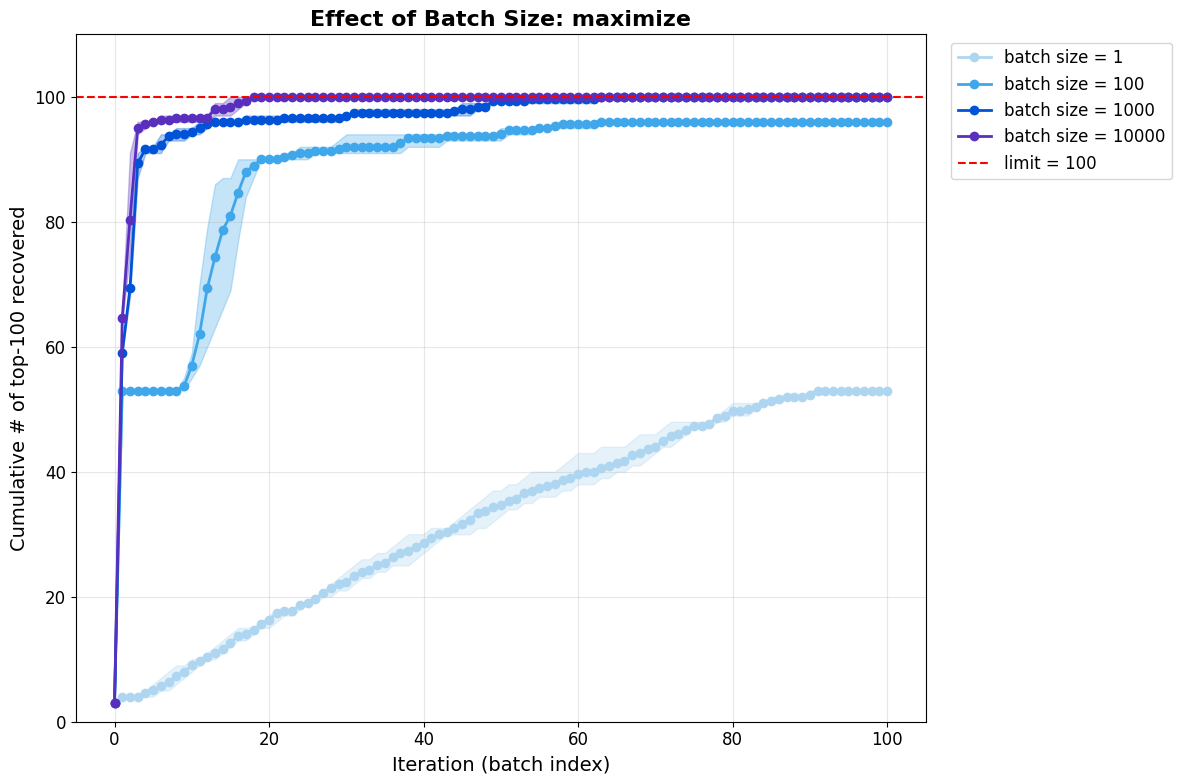

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"
k = 100  # "top k" cutoff for defining actives
batches = [1, 100, 1000, 10000]
method_dir = "maximize"  # or "maximize_boltzmann"

# Load ground truth and get the SMILES of the true top-k
gt = pd.read_csv(ground_truth_csv)
gt_topk_smiles = set(gt.nlargest(k, "normalized_score")["SMILES"])

def per_iter_hits(path):
    """
    Given a single CSV path, compute cumulative # of recovered top-k
    at each iteration:
      - df['batch'] is the iteration index (including 0).
      - For i=0..max_iteration, count how many SMILES with df['batch'] <= i are in gt_topk_smiles.
    Returns a dict {iteration: cumulative_count}.
    """
    df = pd.read_csv(path)
    df = df[["batch", "SMILES"]]
    max_iter = int(df["batch"].max())
    counts = {}
    picked = set()
    for i in range(0, max_iter + 1):
        batch_i_smiles = set(df.loc[df["batch"] == i, "SMILES"])
        picked |= batch_i_smiles
        counts[i] = len(picked & gt_topk_smiles)
    return counts

# For each batch size, collect per-replicate per-iteration counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_hits(p)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per iteration (including iteration 0) for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors to match the image
colors = ['#AED6F1', "#40A7EB", "#0053D7", "#5830BD"]  # Blues

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, color=colors[i % len(colors)], linewidth=2, label=f"batch size = {b}", marker='o')
    plt.fill_between(iters, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Horizontal red line at k
plt.axhline(y=k, color="red", linestyle="--", label=f"limit = {k}")
plt.ylim(0, 110)
# Customize plot to match the image aesthetics
plt.xlabel("Iteration (batch index)", fontsize=14)
plt.ylabel(f"Cumulative # of top-{k} recovered", fontsize=14)
plt.title(f"Effect of Batch Size: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Position legend to match the image
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/{method_dir}_comparison_batch_sizes_top_{k}.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

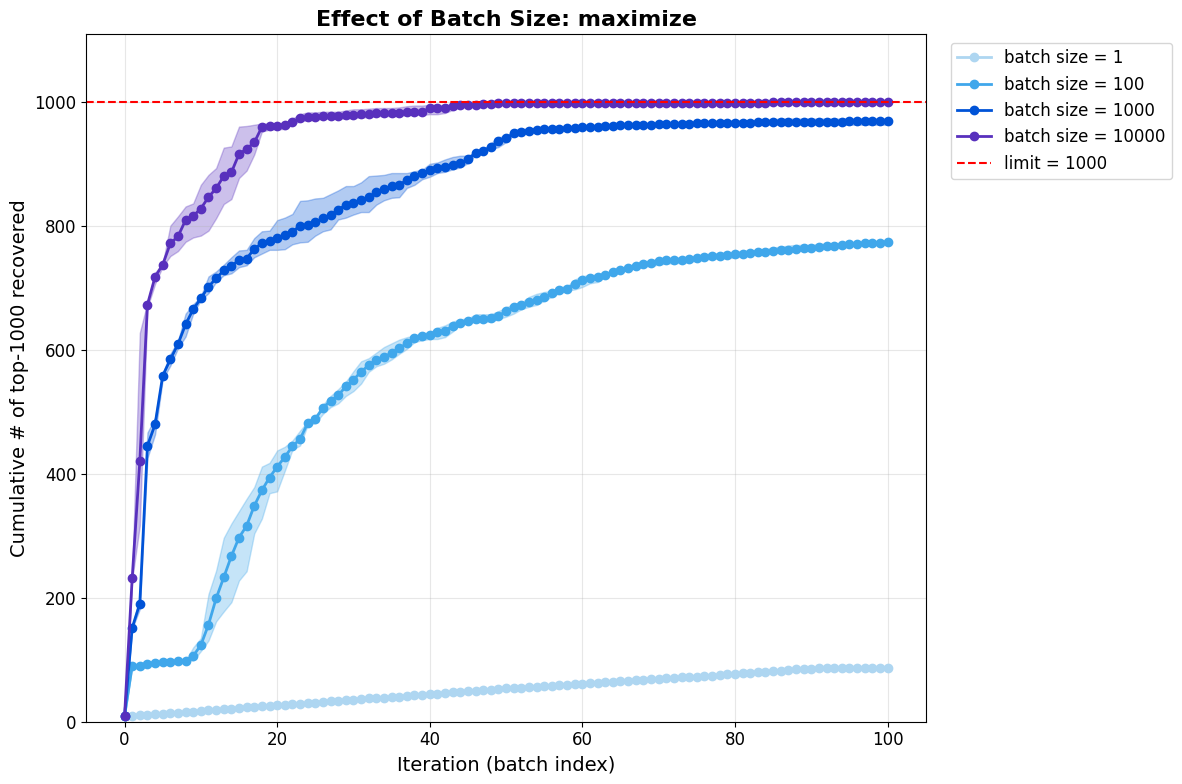

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"
k = 1000  # "top k" cutoff for defining actives
batches = [1, 100, 1000, 10000]
method_dir = "maximize"  # or "maximize_boltzmann"

# Load ground truth and get the SMILES of the true top-k
gt = pd.read_csv(ground_truth_csv)
gt_topk_smiles = set(gt.nlargest(k, "normalized_score")["SMILES"])

def per_iter_hits(path):
    """
    Given a single CSV path, compute cumulative # of recovered top-k
    at each iteration:
      - df['batch'] is the iteration index (including 0).
      - For i=0..max_iteration, count how many SMILES with df['batch'] <= i are in gt_topk_smiles.
    Returns a dict {iteration: cumulative_count}.
    """
    df = pd.read_csv(path)
    df = df[["batch", "SMILES"]]
    max_iter = int(df["batch"].max())
    counts = {}
    picked = set()
    for i in range(0, max_iter + 1):
        batch_i_smiles = set(df.loc[df["batch"] == i, "SMILES"])
        picked |= batch_i_smiles
        counts[i] = len(picked & gt_topk_smiles)
    return counts

# For each batch size, collect per-replicate per-iteration counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_hits(p)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per iteration (including iteration 0) for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors to match the image
colors = ['#AED6F1', "#40A7EB", "#0053D7", "#5830BD"]  # Blues

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, color=colors[i % len(colors)], linewidth=2, label=f"batch size = {b}", marker='o')
    plt.fill_between(iters, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Horizontal red line at k
plt.axhline(y=k, color="red", linestyle="--", label=f"limit = {k}")
plt.ylim(0, 1110)
# Customize plot to match the image aesthetics
plt.xlabel("Iteration (batch index)", fontsize=14)
plt.ylabel(f"Cumulative # of top-{k} recovered", fontsize=14)
plt.title(f"Effect of Batch Size: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Position legend to match the image
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/{method_dir}_comparison_batch_sizes_top_{k}.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
(18*10_000*100)/3.59e6


5.013927576601671

In [70]:
(44*10_000*100)/3.59e6

(18*10_000*100)/3.59e6

(3*10_000*100)/3.59e6

(10*1_000*100)/3.59e6

0.2785515320334262

Total unique synton IDs in database: 1158
Processing batch size 1 with 3 replicates...
Processing batch size 100 with 3 replicates...
Processing batch size 1000 with 3 replicates...
Processing batch size 10000 with 3 replicates...


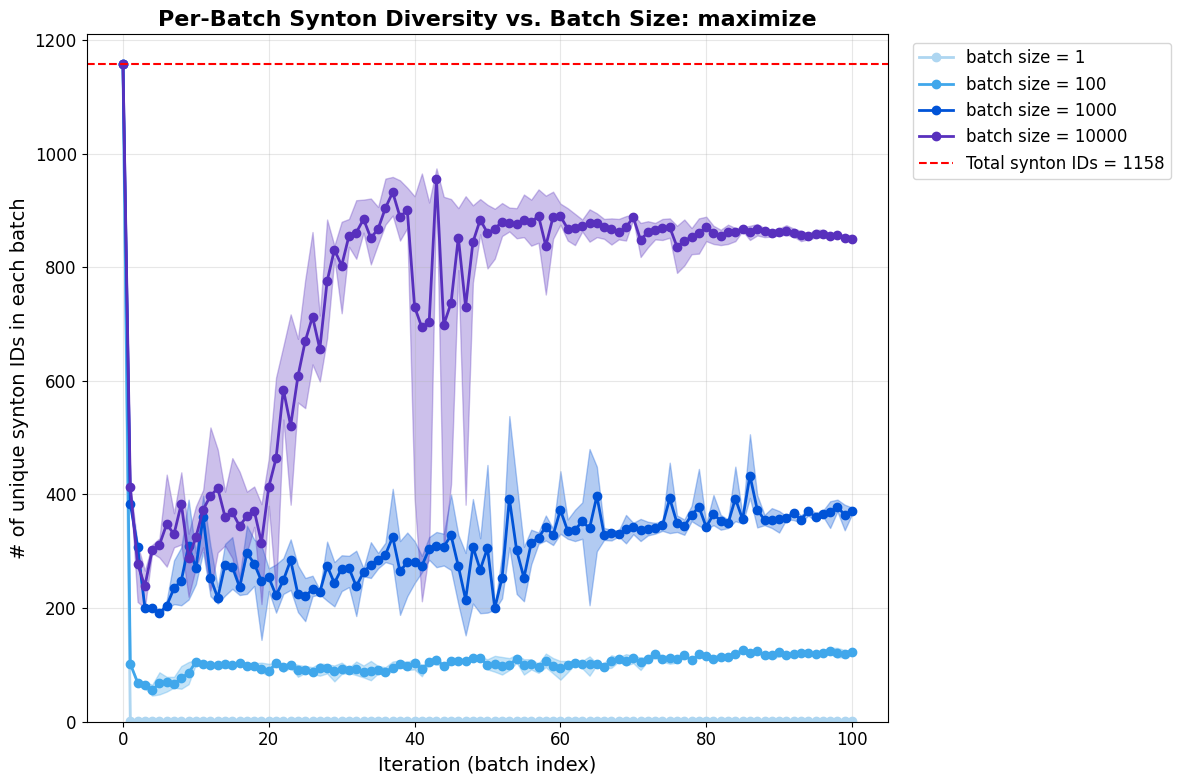


Summary Statistics:
Batch size 1: Average batch diversity = 2.0 synton IDs (range: 2-2)
Batch size 100: Average batch diversity = 102.4 synton IDs (range: 46-130)
Batch size 1000: Average batch diversity = 307.8 synton IDs (range: 144-538)
Batch size 10000: Average batch diversity = 734.6 synton IDs (range: 200-974)


In [7]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
synthon_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/building_blocks/2025-05-28_REAL_example_synthons.smi"  # Your synthon data
batches = [1, 100, 1000, 10000]
method_dir = "maximize"  # or "maximize_boltzmann"

# Load synthon data to get all known synton_ids
synthon_df = pd.read_csv(synthon_csv, sep='\t')  # Assuming tab-separated based on your data
all_synton_ids = set(synthon_df['synton_id'].unique())
print(f"Total unique synton IDs in database: {len(all_synton_ids)}")

def extract_synton_ids_from_name(molecule_name, known_synton_ids):
    """
    Extract synton IDs from a molecule name by matching against known synton IDs.
    This handles the case where synton IDs themselves contain underscores.
    """
    synton_ids = []
    
    # Try to match known synton IDs in the molecule name
    for synton_id in known_synton_ids:
        if synton_id in molecule_name:
            synton_ids.append(synton_id)
    
    return synton_ids

def per_iter_diversity(path, known_synton_ids):
    """
    Given a single CSV path, compute # of unique synton IDs sampled
    in each individual batch (non-cumulative).
    Returns a dict {iteration: unique_synton_count_in_that_batch}.
    """
    df = pd.read_csv(path)
    
    # Check if 'name' column exists, if not try 'SMILES' or other identifier
    if 'name' in df.columns:
        name_col = 'name'
    elif 'SMILES' in df.columns:
        name_col = 'SMILES'
    else:
        print(f"Warning: Could not find name/SMILES column in {path}")
        return {}
    
    max_iter = int(df["batch"].max())
    counts = {}
    
    for i in range(0, max_iter + 1):
        batch_i_names = df.loc[df["batch"] == i, name_col].tolist()
        
        # Extract synton IDs from this specific batch only
        batch_syntons = set()
        for name in batch_i_names:
            synton_ids = extract_synton_ids_from_name(str(name), known_synton_ids)
            batch_syntons.update(synton_ids)
        
        counts[i] = len(batch_syntons)
    
    return counts

# For each batch size, collect per-replicate per-iteration diversity counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    print(f"Processing batch size {b} with {len(paths)} replicates...")

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_diversity(p, all_synton_ids)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per iteration for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors
colors = ['#AED6F1', "#40A7EB", "#0053D7", "#5830BD"]  # Blues

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, color=colors[i % len(colors)], linewidth=2, 
             label=f"batch size = {b}", marker='o')
    plt.fill_between(iters, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Horizontal line showing total available synton diversity
plt.axhline(y=len(all_synton_ids), color="red", linestyle="--", 
           label=f"Total synton IDs = {len(all_synton_ids)}")

# Customize plot
plt.xlabel("Iteration (batch index)", fontsize=14)
plt.ylabel("# of unique synton IDs in each batch", fontsize=14)
plt.title(f"Per-Batch Synton Diversity vs. Batch Size: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)
plt.ylim(0, 1210)

# Position legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/{method_dir}_absolute_synton_diversity_batch_sizes.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

# Print some summary statistics
print("\nSummary Statistics:")
for b in sorted(all_stats.keys()):
    all_batch_diversities = []
    for iter_key in all_stats[b].keys():
        if iter_key > 0:  # Skip iteration 0 (initialization)
            all_batch_diversities.extend(all_stats[b][iter_key])
    
    if all_batch_diversities:
        mean_batch = sum(all_batch_diversities) / len(all_batch_diversities)
        max_batch = max(all_batch_diversities)
        min_batch = min(all_batch_diversities)
        print(f"Batch size {b}: Average batch diversity = {mean_batch:.1f} synton IDs (range: {min_batch}-{max_batch})")

Total unique synton IDs in database: 1158
Processing batch size 1 with 3 replicates...
Processing batch size 100 with 3 replicates...
Processing batch size 1000 with 3 replicates...
Processing batch size 10000 with 3 replicates...


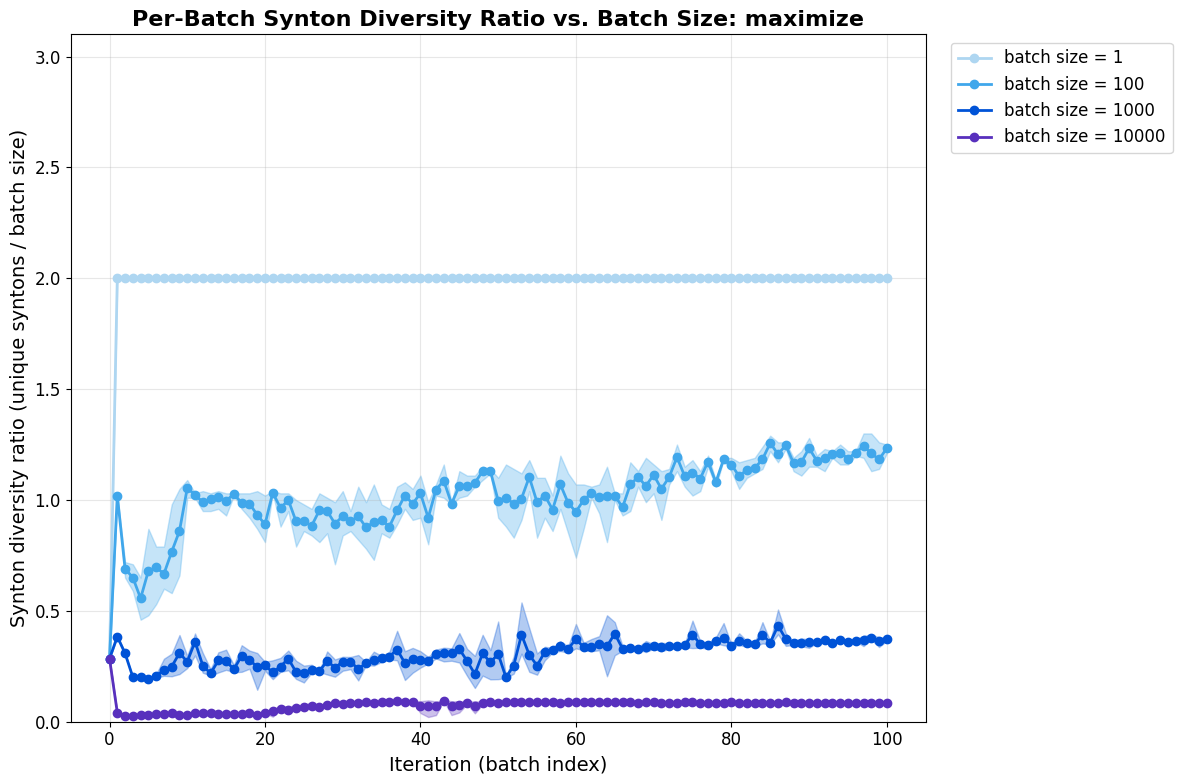


Summary Statistics:
Batch size 1: Average diversity ratio = 2.000 (range: 2.000-2.000)
Batch size 100: Average diversity ratio = 1.024 (range: 0.460-1.300)
Batch size 1000: Average diversity ratio = 0.308 (range: 0.144-0.538)
Batch size 10000: Average diversity ratio = 0.073 (range: 0.020-0.097)


In [8]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
#synthon_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/paste.txt"  # Your synthon data
batches = [1, 100, 1000, 10000]
method_dir = "maximize"  # or "maximize_boltzmann"

# Load synthon data to get all known synton_ids
synthon_df = pd.read_csv(synthon_csv, sep='\t')  # Assuming tab-separated based on your data
all_synton_ids = set(synthon_df['synton_id'].unique())
print(f"Total unique synton IDs in database: {len(all_synton_ids)}")

def extract_synton_ids_from_name(molecule_name, known_synton_ids):
    """
    Extract synton IDs from a molecule name by matching against known synton IDs.
    This handles the case where synton IDs themselves contain underscores.
    """
    synton_ids = []
    
    # Try to match known synton IDs in the molecule name
    for synton_id in known_synton_ids:
        if synton_id in molecule_name:
            synton_ids.append(synton_id)
    
    return synton_ids

def per_iter_diversity(path, known_synton_ids, batch_size):
    """
    Given a single CSV path, compute diversity ratio (unique synton IDs / batch size)
    in each individual batch (non-cumulative).
    Returns a dict {iteration: diversity_ratio_in_that_batch}.
    """
    df = pd.read_csv(path)
    
    # Check if 'name' column exists, if not try 'SMILES' or other identifier
    if 'name' in df.columns:
        name_col = 'name'
    elif 'SMILES' in df.columns:
        name_col = 'SMILES'
    else:
        print(f"Warning: Could not find name/SMILES column in {path}")
        return {}
    
    max_iter = int(df["batch"].max())
    counts = {}
    
    for i in range(0, max_iter + 1):
        batch_i_names = df.loc[df["batch"] == i, name_col].tolist()
        
        # Extract synton IDs from this specific batch only
        batch_syntons = set()
        for name in batch_i_names:
            synton_ids = extract_synton_ids_from_name(str(name), known_synton_ids)
            batch_syntons.update(synton_ids)
        
        # Calculate diversity ratio (unique syntons / batch size)
        actual_batch_size = len(batch_i_names)
        if actual_batch_size > 0:
            counts[i] = len(batch_syntons) / actual_batch_size
        else:
            counts[i] = 0
    
    return counts

# For each batch size, collect per-replicate per-iteration diversity counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    print(f"Processing batch size {b} with {len(paths)} replicates...")

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_diversity(p, all_synton_ids, b)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per iteration for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors
colors = ['#AED6F1', "#40A7EB", "#0053D7", "#5830BD"]  # Blues

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, color=colors[i % len(colors)], linewidth=2, 
             label=f"batch size = {b}", marker='o')
    plt.fill_between(iters, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Remove the horizontal line since it's no longer meaningful for ratios
# plt.axhline(y=len(all_synton_ids), color="red", linestyle="--", 
#            label=f"Total synton IDs = {len(all_synton_ids)}")

# Customize plot
plt.xlabel("Iteration (batch index)", fontsize=14)
plt.ylabel("Synton diversity ratio (unique syntons / batch size)", fontsize=14)
plt.title(f"Per-Batch Synton Diversity Ratio vs. Batch Size: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)
plt.ylim(0, 3.1)
# Position legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/{method_dir}_relative_synton_diversity_batch_sizes.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

# Print some summary statistics
print("\nSummary Statistics:")
for b in sorted(all_stats.keys()):
    all_batch_diversities = []
    for iter_key in all_stats[b].keys():
        if iter_key > 0:  # Skip iteration 0 (initialization)
            all_batch_diversities.extend(all_stats[b][iter_key])
    
    if all_batch_diversities:
        mean_batch = sum(all_batch_diversities) / len(all_batch_diversities)
        max_batch = max(all_batch_diversities)
        min_batch = min(all_batch_diversities)
        print(f"Batch size {b}: Average diversity ratio = {mean_batch:.3f} (range: {min_batch:.3f}-{max_batch:.3f})")

## maximize boltzmann

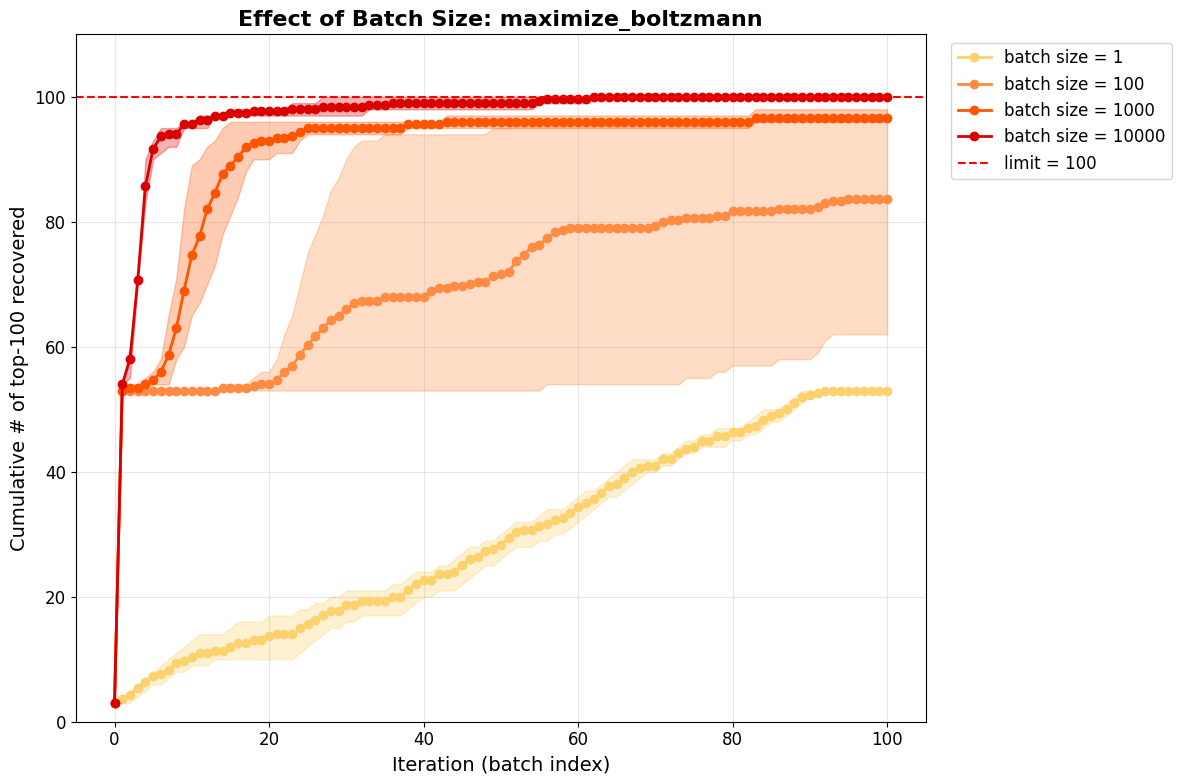

In [4]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"
k = 100  # "top k" cutoff for defining actives
batches = [1, 100, 1000, 10000]
method_dir = "maximize_boltzmann"  # or "maximize_boltzmann"

# Load ground truth and get the SMILES of the true top-k
gt = pd.read_csv(ground_truth_csv)
gt_topk_smiles = set(gt.nlargest(k, "normalized_score")["SMILES"])

def per_iter_hits(path):
    """
    Given a single CSV path, compute cumulative # of recovered top-k
    at each iteration:
      - df['batch'] is the iteration index (including 0).
      - For i=0..max_iteration, count how many SMILES with df['batch'] <= i are in gt_topk_smiles.
    Returns a dict {iteration: cumulative_count}.
    """
    df = pd.read_csv(path)
    df = df[["batch", "SMILES"]]
    max_iter = int(df["batch"].max())
    counts = {}
    picked = set()
    for i in range(0, max_iter + 1):
        batch_i_smiles = set(df.loc[df["batch"] == i, "SMILES"])
        picked |= batch_i_smiles
        counts[i] = len(picked & gt_topk_smiles)
    return counts

# For each batch size, collect per-replicate per-iteration counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_hits(p)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per iteration (including iteration 0) for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors to match the image
colors = ["#FBD26D", '#FF8C42', "#FF5500", "#DB0000"]  # Orange shades from light to dark

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, color=colors[i % len(colors)], linewidth=2, label=f"batch size = {b}", marker='o')
    plt.fill_between(iters, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Horizontal red line at k
plt.axhline(y=k, color="red", linestyle="--", label=f"limit = {k}")
plt.ylim(0, 110)
# Customize plot to match the image aesthetics
plt.xlabel("Iteration (batch index)", fontsize=14)
plt.ylabel(f"Cumulative # of top-{k} recovered", fontsize=14)
plt.title(f"Effect of Batch Size: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Position legend to match the image
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/{method_dir}_comparison_batch_sizes_top_{k}.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

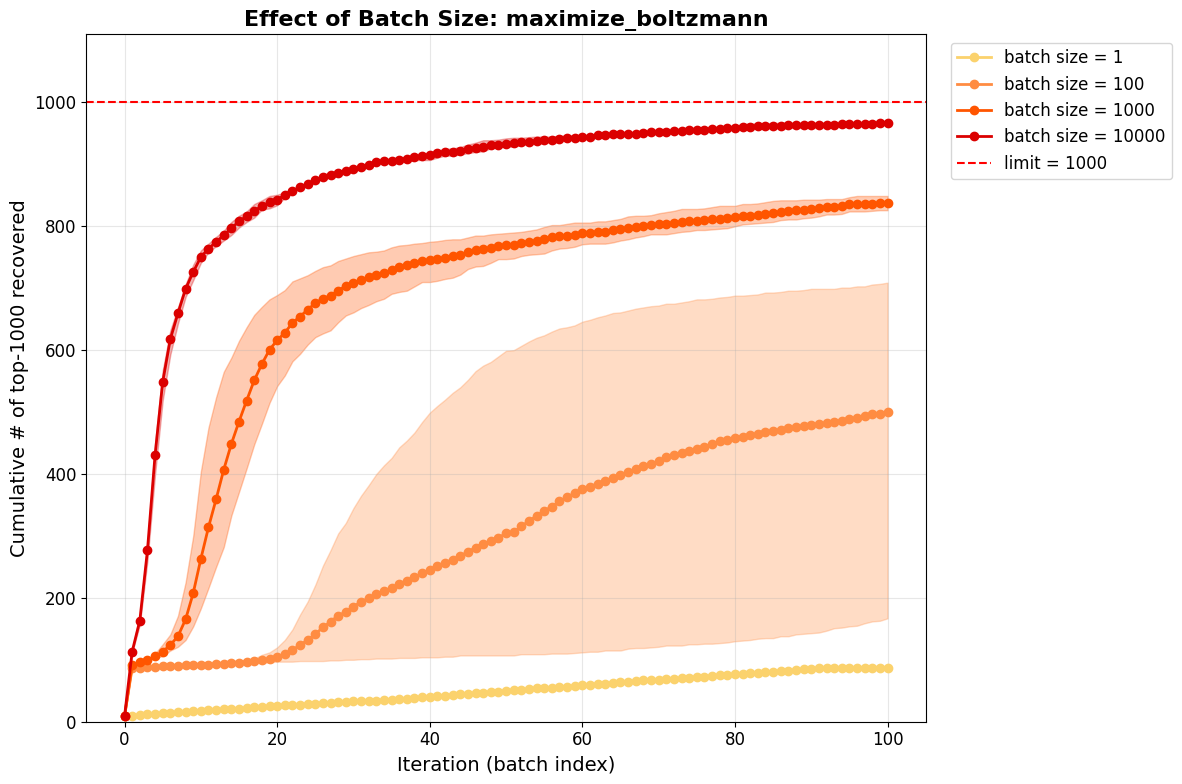

In [5]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"
k = 1000  # "top k" cutoff for defining actives
batches = [1, 100, 1000, 10000]
method_dir = "maximize_boltzmann"  # or "maximize_boltzmann"

# Load ground truth and get the SMILES of the true top-k
gt = pd.read_csv(ground_truth_csv)
gt_topk_smiles = set(gt.nlargest(k, "normalized_score")["SMILES"])

def per_iter_hits(path):
    """
    Given a single CSV path, compute cumulative # of recovered top-k
    at each iteration:
      - df['batch'] is the iteration index (including 0).
      - For i=0..max_iteration, count how many SMILES with df['batch'] <= i are in gt_topk_smiles.
    Returns a dict {iteration: cumulative_count}.
    """
    df = pd.read_csv(path)
    df = df[["batch", "SMILES"]]
    max_iter = int(df["batch"].max())
    counts = {}
    picked = set()
    for i in range(0, max_iter + 1):
        batch_i_smiles = set(df.loc[df["batch"] == i, "SMILES"])
        picked |= batch_i_smiles
        counts[i] = len(picked & gt_topk_smiles)
    return counts

# For each batch size, collect per-replicate per-iteration counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_hits(p)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per iteration (including iteration 0) for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors to match the image
colors = ["#FBD26D", '#FF8C42', "#FF5500", "#DB0000"]  # Orange shades from light to dark

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, color=colors[i % len(colors)], linewidth=2, label=f"batch size = {b}", marker='o')
    plt.fill_between(iters, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Horizontal red line at k
plt.axhline(y=k, color="red", linestyle="--", label=f"limit = {k}")
plt.ylim(0, 1110)

# Customize plot to match the image aesthetics
plt.xlabel("Iteration (batch index)", fontsize=14)
plt.ylabel(f"Cumulative # of top-{k} recovered", fontsize=14)
plt.title(f"Effect of Batch Size: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Position legend to match the image
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/{method_dir}_comparison_batch_sizes_top_{k}.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

Total unique synton IDs in database: 1158
Processing batch size 1 with 3 replicates...
Processing batch size 100 with 3 replicates...
Processing batch size 1000 with 3 replicates...
Processing batch size 10000 with 3 replicates...


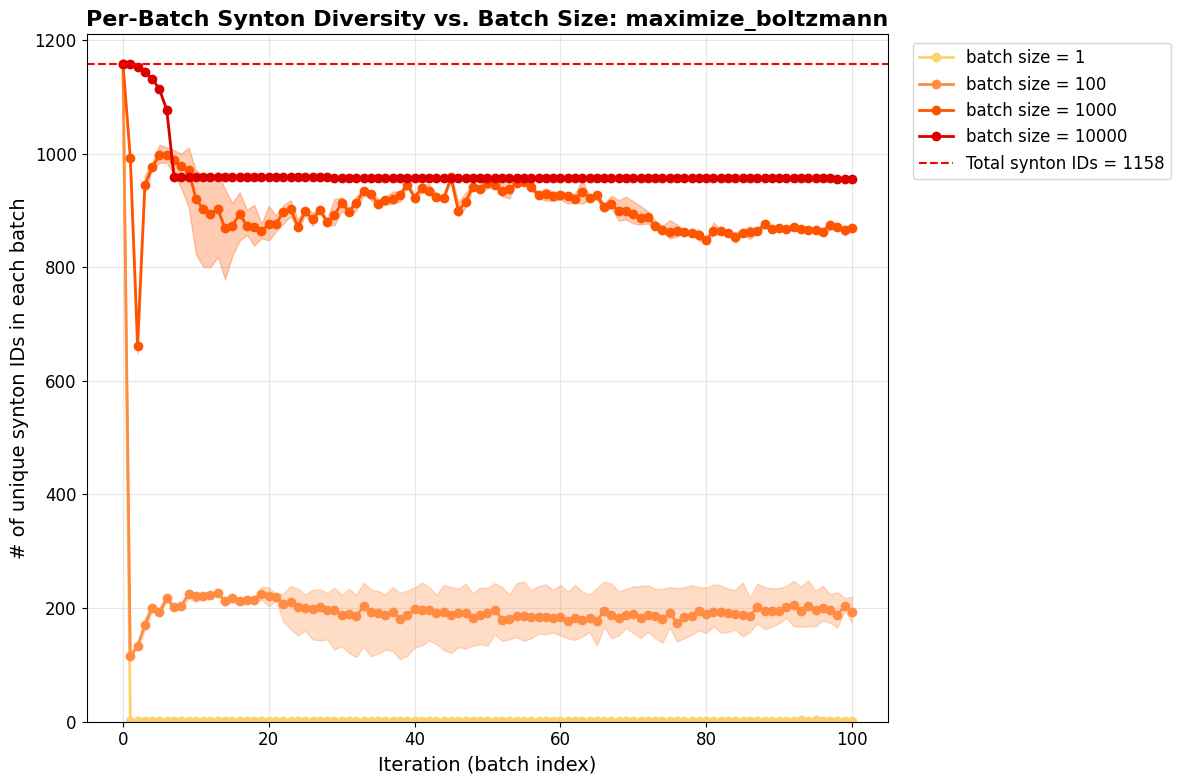


Summary Statistics:
Batch size 1: Average batch diversity = 2.0 synton IDs (range: 2-3)
Batch size 100: Average batch diversity = 193.8 synton IDs (range: 110-249)
Batch size 1000: Average batch diversity = 901.9 synton IDs (range: 648-1016)
Batch size 10000: Average batch diversity = 967.5 synton IDs (range: 955-1158)


In [9]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
synthon_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/building_blocks/2025-05-28_REAL_example_synthons.smi"  # Your synthon data
batches = [1, 100, 1000, 10000]
method_dir = "maximize_boltzmann"  # or "maximize_boltzmann"

# Load synthon data to get all known synton_ids
synthon_df = pd.read_csv(synthon_csv, sep='\t')  # Assuming tab-separated based on your data
all_synton_ids = set(synthon_df['synton_id'].unique())
print(f"Total unique synton IDs in database: {len(all_synton_ids)}")

def extract_synton_ids_from_name(molecule_name, known_synton_ids):
    """
    Extract synton IDs from a molecule name by matching against known synton IDs.
    This handles the case where synton IDs themselves contain underscores.
    """
    synton_ids = []
    
    # Try to match known synton IDs in the molecule name
    for synton_id in known_synton_ids:
        if synton_id in molecule_name:
            synton_ids.append(synton_id)
    
    return synton_ids

def per_iter_diversity(path, known_synton_ids):
    """
    Given a single CSV path, compute # of unique synton IDs sampled
    in each individual batch (non-cumulative).
    Returns a dict {iteration: unique_synton_count_in_that_batch}.
    """
    df = pd.read_csv(path)
    
    # Check if 'name' column exists, if not try 'SMILES' or other identifier
    if 'name' in df.columns:
        name_col = 'name'
    elif 'SMILES' in df.columns:
        name_col = 'SMILES'
    else:
        print(f"Warning: Could not find name/SMILES column in {path}")
        return {}
    
    max_iter = int(df["batch"].max())
    counts = {}
    
    for i in range(0, max_iter + 1):
        batch_i_names = df.loc[df["batch"] == i, name_col].tolist()
        
        # Extract synton IDs from this specific batch only
        batch_syntons = set()
        for name in batch_i_names:
            synton_ids = extract_synton_ids_from_name(str(name), known_synton_ids)
            batch_syntons.update(synton_ids)
        
        counts[i] = len(batch_syntons)
    
    return counts

# For each batch size, collect per-replicate per-iteration diversity counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    print(f"Processing batch size {b} with {len(paths)} replicates...")

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_diversity(p, all_synton_ids)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per iteration for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors
colors = ["#FBD26D", '#FF8C42', "#FF5500", "#DB0000"]  # Orange shades from light to dark

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, color=colors[i % len(colors)], linewidth=2, 
             label=f"batch size = {b}", marker='o')
    plt.fill_between(iters, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Horizontal line showing total available synton diversity
plt.axhline(y=len(all_synton_ids), color="red", linestyle="--", 
           label=f"Total synton IDs = {len(all_synton_ids)}")

# Customize plot
plt.xlabel("Iteration (batch index)", fontsize=14)
plt.ylabel("# of unique synton IDs in each batch", fontsize=14)
plt.title(f"Per-Batch Synton Diversity vs. Batch Size: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)
plt.ylim(0, 1210)

# Position legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'figures/{method_dir}_absolute_synton_diversity_batch_sizes.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

# Print some summary statistics
print("\nSummary Statistics:")
for b in sorted(all_stats.keys()):
    all_batch_diversities = []
    for iter_key in all_stats[b].keys():
        if iter_key > 0:  # Skip iteration 0 (initialization)
            all_batch_diversities.extend(all_stats[b][iter_key])
    
    if all_batch_diversities:
        mean_batch = sum(all_batch_diversities) / len(all_batch_diversities)
        max_batch = max(all_batch_diversities)
        min_batch = min(all_batch_diversities)
        print(f"Batch size {b}: Average batch diversity = {mean_batch:.1f} synton IDs (range: {min_batch}-{max_batch})")

Total unique synton IDs in database: 1158
Processing batch size 1 with 3 replicates...
Processing batch size 100 with 3 replicates...
Processing batch size 1000 with 3 replicates...
Processing batch size 10000 with 3 replicates...


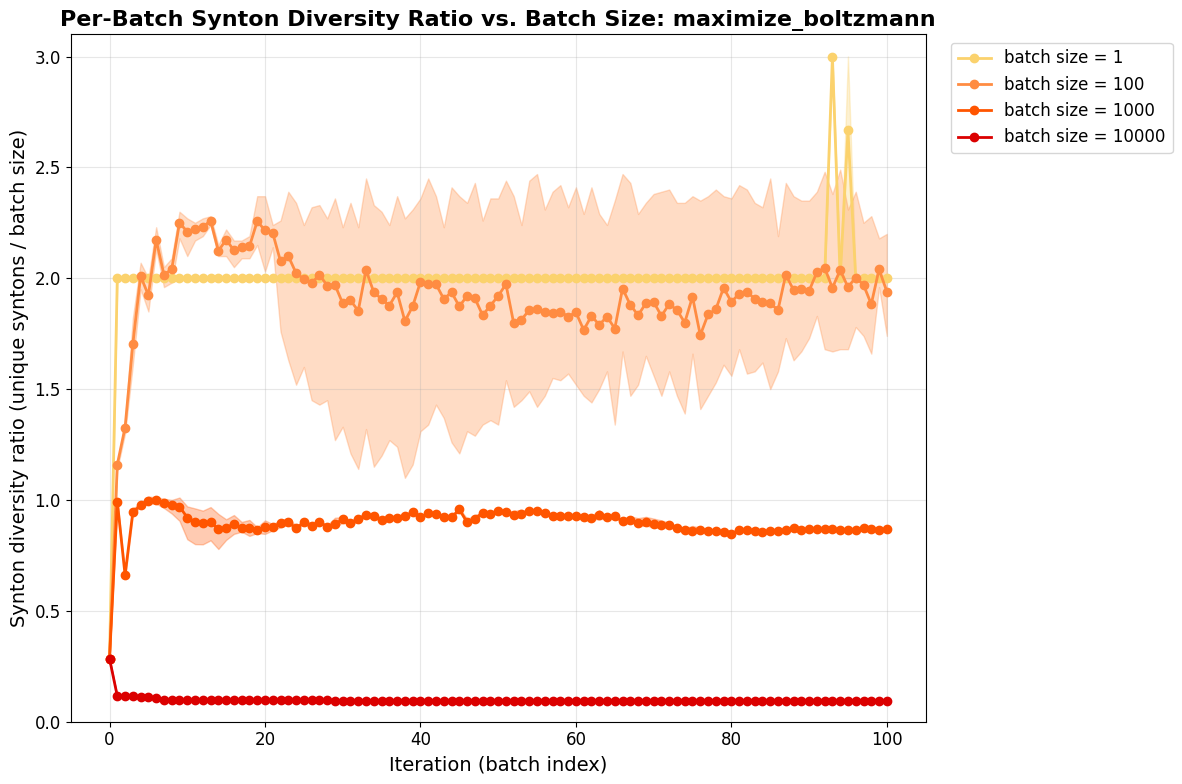


Summary Statistics:
Batch size 1: Average diversity ratio = 2.017 (range: 2.000-3.000)
Batch size 100: Average diversity ratio = 1.938 (range: 1.100-2.490)
Batch size 1000: Average diversity ratio = 0.902 (range: 0.648-1.016)
Batch size 10000: Average diversity ratio = 0.097 (range: 0.096-0.116)


In [10]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
#synthon_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/paste.txt"  # Your synthon data
batches = [1, 100, 1000, 10000]
method_dir = "maximize_boltzmann"  # or "maximize_boltzmann"

# Load synthon data to get all known synton_ids
synthon_df = pd.read_csv(synthon_csv, sep='\t')  # Assuming tab-separated based on your data
all_synton_ids = set(synthon_df['synton_id'].unique())
print(f"Total unique synton IDs in database: {len(all_synton_ids)}")

def extract_synton_ids_from_name(molecule_name, known_synton_ids):
    """
    Extract synton IDs from a molecule name by matching against known synton IDs.
    This handles the case where synton IDs themselves contain underscores.
    """
    synton_ids = []
    
    # Try to match known synton IDs in the molecule name
    for synton_id in known_synton_ids:
        if synton_id in molecule_name:
            synton_ids.append(synton_id)
    
    return synton_ids

def per_iter_diversity(path, known_synton_ids, batch_size):
    """
    Given a single CSV path, compute diversity ratio (unique synton IDs / batch size)
    in each individual batch (non-cumulative).
    Returns a dict {iteration: diversity_ratio_in_that_batch}.
    """
    df = pd.read_csv(path)
    
    # Check if 'name' column exists, if not try 'SMILES' or other identifier
    if 'name' in df.columns:
        name_col = 'name'
    elif 'SMILES' in df.columns:
        name_col = 'SMILES'
    else:
        print(f"Warning: Could not find name/SMILES column in {path}")
        return {}
    
    max_iter = int(df["batch"].max())
    counts = {}
    
    for i in range(0, max_iter + 1):
        batch_i_names = df.loc[df["batch"] == i, name_col].tolist()
        
        # Extract synton IDs from this specific batch only
        batch_syntons = set()
        for name in batch_i_names:
            synton_ids = extract_synton_ids_from_name(str(name), known_synton_ids)
            batch_syntons.update(synton_ids)
        
        # Calculate diversity ratio (unique syntons / batch size)
        actual_batch_size = len(batch_i_names)
        if actual_batch_size > 0:
            counts[i] = len(batch_syntons) / actual_batch_size
        else:
            counts[i] = 0
    
    return counts

# For each batch size, collect per-replicate per-iteration diversity counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    print(f"Processing batch size {b} with {len(paths)} replicates...")

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_diversity(p, all_synton_ids, b)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per iteration for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors
colors = ["#FBD26D", '#FF8C42', "#FF5500", "#DB0000"]  # Orange shades from light to dark

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, color=colors[i % len(colors)], linewidth=2, 
             label=f"batch size = {b}", marker='o')
    plt.fill_between(iters, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Remove the horizontal line since it's no longer meaningful for ratios
# plt.axhline(y=len(all_synton_ids), color="red", linestyle="--", 
#            label=f"Total synton IDs = {len(all_synton_ids)}")

# Customize plot
plt.xlabel("Iteration (batch index)", fontsize=14)
plt.ylabel("Synton diversity ratio (unique syntons / batch size)", fontsize=14)
plt.title(f"Per-Batch Synton Diversity Ratio vs. Batch Size: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Position legend
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
plt.ylim(0, 3.1)
plt.tight_layout()
plt.savefig(f'figures/{method_dir}_relative_synton_diversity_batch_sizes.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

# Print some summary statistics
print("\nSummary Statistics:")
for b in sorted(all_stats.keys()):
    all_batch_diversities = []
    for iter_key in all_stats[b].keys():
        if iter_key > 0:  # Skip iteration 0 (initialization)
            all_batch_diversities.extend(all_stats[b][iter_key])
    
    if all_batch_diversities:
        mean_batch = sum(all_batch_diversities) / len(all_batch_diversities)
        max_batch = max(all_batch_diversities)
        min_batch = min(all_batch_diversities)
        print(f"Batch size {b}: Average diversity ratio = {mean_batch:.3f} (range: {min_batch:.3f}-{max_batch:.3f})")



In [44]:
len(gt)

3590000

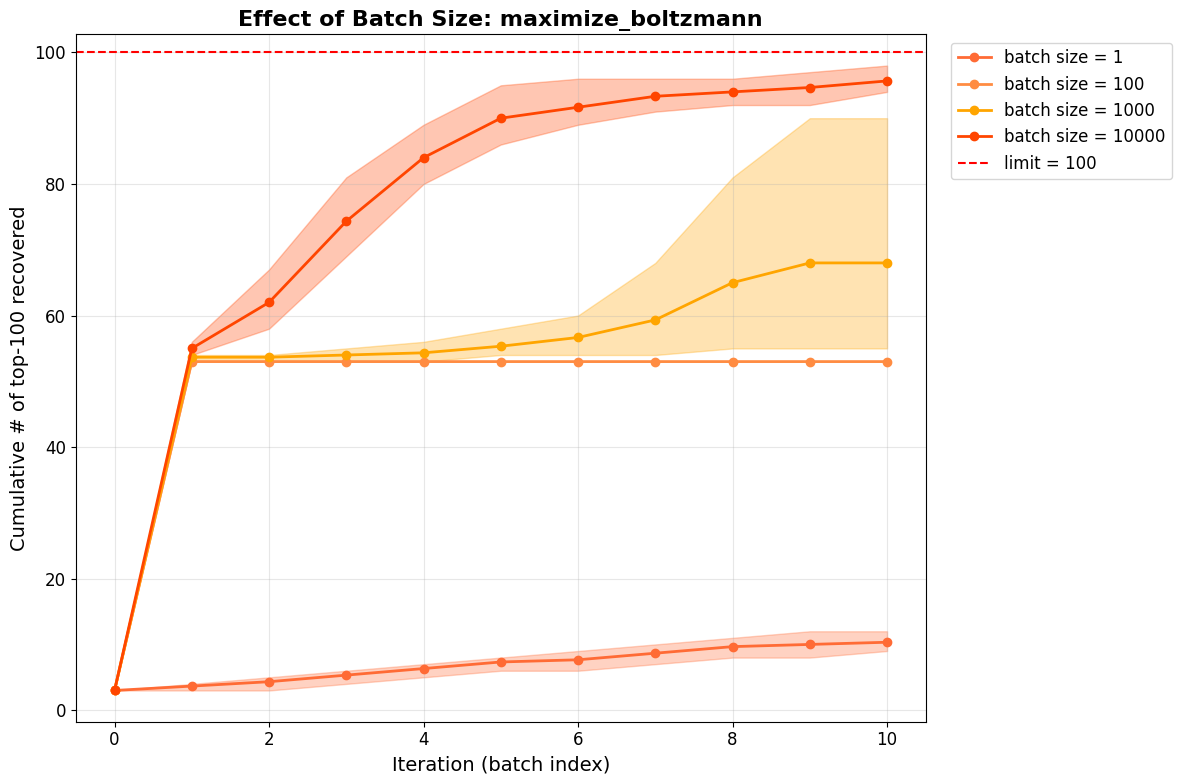

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"
k = 100  # "top k" cutoff for defining actives
batches = [1, 100, 1000, 10000]
method_dir = "maximize_boltzmann"  # or "maximize_boltzmann"

# Load ground truth and get the SMILES of the true top-k
gt = pd.read_csv(ground_truth_csv)
gt_topk_smiles = set(gt.nlargest(k, "normalized_score")["SMILES"])

def per_iter_hits(path):
    """
    Given a single CSV path, compute cumulative # of recovered top-k
    at each iteration:
      - df['batch'] is the iteration index (including 0).
      - For i=0..max_iteration, count how many SMILES with df['batch'] <= i are in gt_topk_smiles.
    Returns a dict {iteration: cumulative_count}.
    """
    df = pd.read_csv(path)
    df = df[["batch", "SMILES"]]
    max_iter = int(df["batch"].max())
    counts = {}
    picked = set()
    for i in range(0, max_iter + 1):
        batch_i_smiles = set(df.loc[df["batch"] == i, "SMILES"])
        picked |= batch_i_smiles
        counts[i] = len(picked & gt_topk_smiles)
    return counts

# For each batch size, collect per-replicate per-iteration counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_hits(p)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per iteration (including iteration 0) for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors to match the image
colors = ["#FBD26D", '#FF8C42', "#FF5500", "#DB0000"]  # Orange shades from light to dark

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, color=colors[i % len(colors)], linewidth=2, label=f"batch size = {b}", marker='o')
    plt.fill_between(iters, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Horizontal red line at k
plt.axhline(y=k, color="red", linestyle="--", label=f"limit = {k}")

# Customize plot to match the image aesthetics
plt.xlabel("Iteration (batch index)", fontsize=14)
plt.ylabel(f"Cumulative # of top-{k} recovered", fontsize=14)
plt.title(f"Effect of Batch Size: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Position legend to match the image
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'{method_dir}_comparison_batch_sizes.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

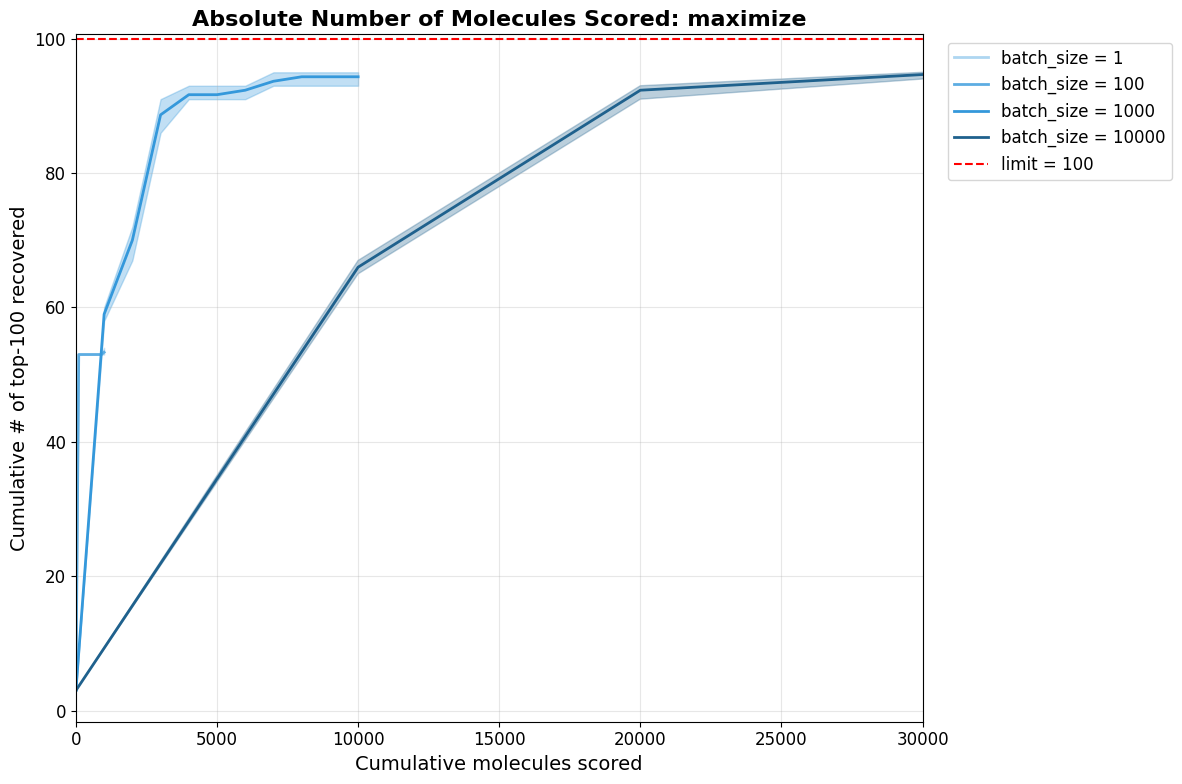

In [40]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"
k = 100  # "top k" cutoff for defining actives
batches = [1, 100, 1000, 10000]
method_dir = "maximize"  # or "maximize_boltzmann"

# Load ground truth and get the SMILES of the true top-k
gt = pd.read_csv(ground_truth_csv)
gt_topk_smiles = set(gt.nlargest(k, "normalized_score")["SMILES"])

def per_iter_hits(path):
    """
    Given a single CSV path, compute cumulative # of recovered top-k
    at each iteration:
      - df['batch'] is the iteration index (including 0).
      - For i=0..max_iteration, count how many SMILES with df['batch'] <= i are in gt_topk_smiles.
    Returns a dict {iteration: cumulative_count}.
    """
    df = pd.read_csv(path)
    df = df[["batch", "SMILES"]]
    max_iter = int(df["batch"].max())
    counts = {}
    picked = set()
    for i in range(0, max_iter + 1):
        batch_i_smiles = set(df.loc[df["batch"] == i, "SMILES"])
        picked |= batch_i_smiles
        counts[i] = len(picked & gt_topk_smiles)
    return counts

# For each batch size, collect per-replicate per-iteration counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_hits(p)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per "molecules scored" (iteration * batch_size) for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors
colors = ['#AED6F1', '#5DADE2', '#3498DB', '#1F618D']  # Blues


for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    x_vals = [i * b for i in iters]  # convert iteration → cumulative molecules scored
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(x_vals, means, color=colors[i % len(colors)], linewidth=2, label=f"batch_size = {b}")
    plt.fill_between(x_vals, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Horizontal red line at k
plt.axhline(y=k, color="red", linestyle="--", label=f"limit = {k}")

# Set x-axis limit
plt.xlim(0, 30_000)
# Customize plot to match the image aesthetics
plt.xlabel("Cumulative molecules scored", fontsize=14)
plt.ylabel(f"Cumulative # of top-{k} recovered", fontsize=14)
plt.title(f"Absolute Number of Molecules Scored: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Position legend to match the image
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'absolute_number_scored_{method_dir}.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
10_000/3.6e6

0.002777777777777778

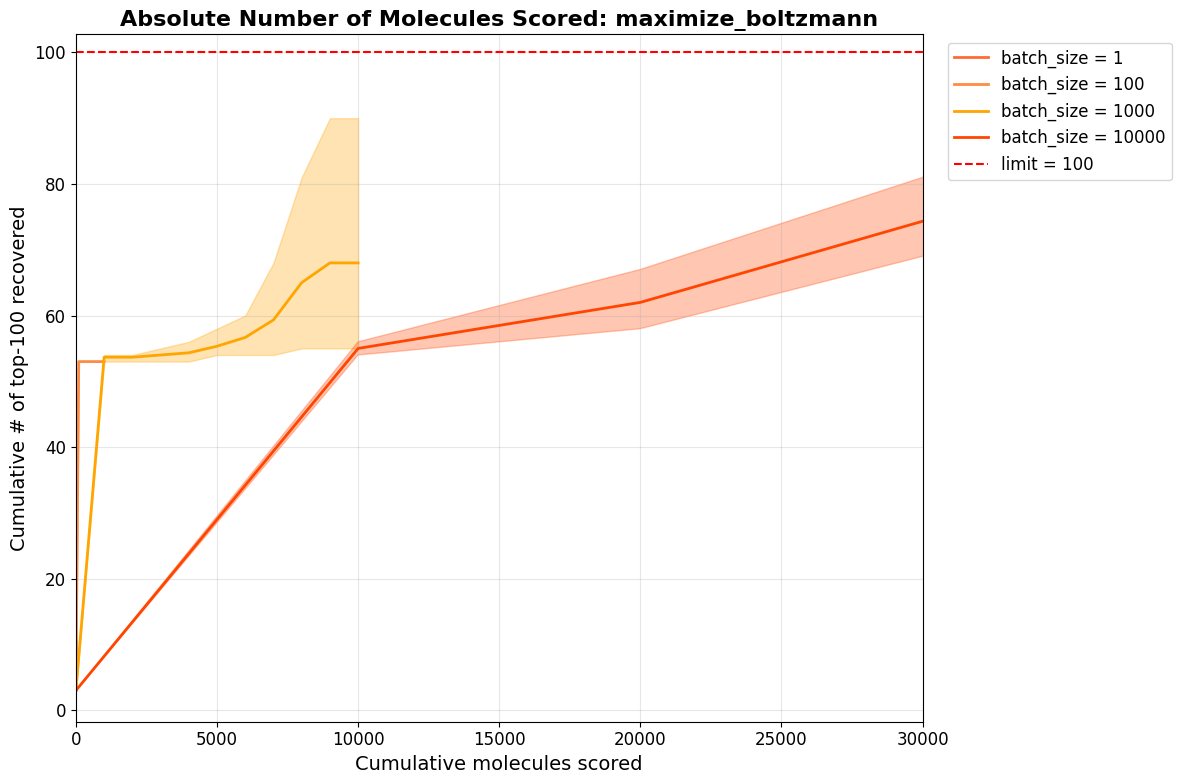

In [41]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Parameters
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"
k = 100  # "top k" cutoff for defining actives
batches = [1, 100, 1000, 10000]
method_dir = "maximize_boltzmann"  # or "maximize_boltzmann"

# Load ground truth and get the SMILES of the true top-k
gt = pd.read_csv(ground_truth_csv)
gt_topk_smiles = set(gt.nlargest(k, "normalized_score")["SMILES"])

def per_iter_hits(path):
    """
    Given a single CSV path, compute cumulative # of recovered top-k
    at each iteration:
      - df['batch'] is the iteration index (including 0).
      - For i=0..max_iteration, count how many SMILES with df['batch'] <= i are in gt_topk_smiles.
    Returns a dict {iteration: cumulative_count}.
    """
    df = pd.read_csv(path)
    df = df[["batch", "SMILES"]]
    max_iter = int(df["batch"].max())
    counts = {}
    picked = set()
    for i in range(0, max_iter + 1):
        batch_i_smiles = set(df.loc[df["batch"] == i, "SMILES"])
        picked |= batch_i_smiles
        counts[i] = len(picked & gt_topk_smiles)
    return counts

# For each batch size, collect per-replicate per-iteration counts
all_stats = {}  # {batch_size: {iter: [counts from each replicate]}}
for b in batches:
    folder_pattern = f"runs/{method_dir}/batch_{b}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        print(f"Warning: no files under runs/{method_dir}/batch_{b}/ → skipping")
        continue

    # Find the maximum iteration across all replicates
    max_over_all = 0
    for p in paths:
        df_temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(df_temp["batch"].max()))

    # Initialize stats for iterations 0..max_over_all
    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_hits(p)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)

    all_stats[b] = stats

# Plot mean ± range per "molecules scored" (iteration * batch_size) for each batch size
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

# Define colors
colors = ['#FF6B35', '#FF8C42', '#FFA500', '#FF4500']

for i, b in enumerate(sorted(all_stats)):
    stats = all_stats[b]
    iters = sorted(stats.keys())
    x_vals = [i * b for i in iters]  # convert iteration → cumulative molecules scored
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(x_vals, means, color=colors[i % len(colors)], linewidth=2, label=f"batch_size = {b}")
    plt.fill_between(x_vals, mins, maxs, color=colors[i % len(colors)], alpha=0.3)

# Horizontal red line at k
plt.axhline(y=k, color="red", linestyle="--", label=f"limit = {k}")

# Set x-axis limit
plt.xlim(0, 30_000)
# Customize plot to match the image aesthetics
plt.xlabel("Cumulative molecules scored", fontsize=14)
plt.ylabel(f"Cumulative # of top-{k} recovered", fontsize=14)
plt.title(f"Absolute Number of Molecules Scored: {method_dir}", fontsize=16, fontweight='bold')

# Add grid
plt.grid(True, alpha=0.3)

# Position legend to match the image
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig(f'absolute_number_scored_{method_dir}.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

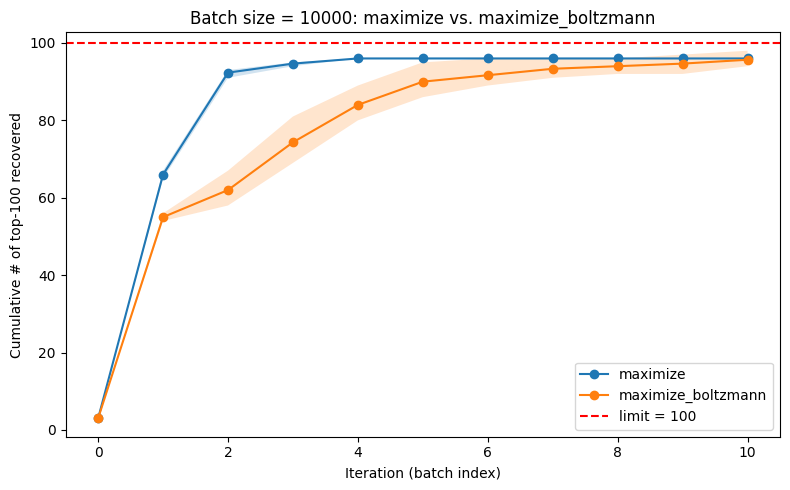

In [15]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# ---- Parameters (edit batch_size as needed) ----
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"
k = 100  # “top k” cutoff for defining actives
batch_size = 10000     # ← change this to 1, 1000, or 10000
methods = ["maximize", "maximize_boltzmann"]
# ------------------------------------------------

# Load ground truth and get the SMILES of the true top-k
gt = pd.read_csv(ground_truth_csv)
gt_topk_smiles = set(gt.nlargest(k, "normalized_score")["SMILES"])

def per_iter_hits(path):
    """
    Given a single CSV path, compute cumulative # of recovered top-k
    at each iteration (including iteration 0).
    df['batch'] is the iteration index.
    Returns a dict {iteration: cumulative_count}.
    """
    df = pd.read_csv(path)[["batch", "SMILES"]]
    max_iter = int(df["batch"].max())
    counts = {}
    picked = set()
    for i in range(0, max_iter + 1):
        picked |= set(df.loc[df["batch"] == i, "SMILES"])
        counts[i] = len(picked & gt_topk_smiles)
    return counts

# Collect stats for each method
all_stats = {}  # {method: {iter: [counts from each replicate]}}
for m in methods:
    folder_pattern = f"runs/{m}/batch_{batch_size}/*.csv"
    paths = glob.glob(folder_pattern)
    if not paths:
        raise FileNotFoundError(f"No files found under runs/{m}/batch_{batch_size}/")

    # Determine max iteration across replicates
    max_over_all = 0
    for p in paths:
        temp = pd.read_csv(p)
        max_over_all = max(max_over_all, int(temp["batch"].max()))

    stats = {i: [] for i in range(0, max_over_all + 1)}
    for p in paths:
        rep_counts = per_iter_hits(p)
        last = 0
        for i in range(0, max_over_all + 1):
            if i in rep_counts:
                last = rep_counts[i]
            stats[i].append(last)
    all_stats[m] = stats

# Plot mean ± range for each method
plt.figure(figsize=(8, 5))
for m in methods:
    stats = all_stats[m]
    iters = sorted(stats.keys())
    means = [sum(stats[i]) / len(stats[i]) for i in iters]
    mins  = [min(stats[i]) for i in iters]
    maxs  = [max(stats[i]) for i in iters]

    plt.plot(iters, means, marker="o", label=m)
    plt.fill_between(iters, mins, maxs, alpha=0.2)

# Horizontal red line at k
plt.axhline(y=k, color="red", linestyle="--", label=f"limit = {k}")
plt.xlabel("Iteration (batch index)")
plt.ylabel(f"Cumulative # of top-{k} recovered")
plt.title(f"Batch size = {batch_size}: maximize vs. maximize_boltzmann")
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
#!/usr/bin/env python3
"""
Thompson Sampling Top-K Recovery Analysis

Analyzes how many of the top-k ground truth molecules are recovered over time
across multiple replicate runs, comparing maximize vs maximize_boltzmann modes.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import glob
from typing import Dict, List, Tuple, Optional

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

def load_data_fast(ground_truth_csv: str, ts_results_csv: str, k: int = 100, maximize: bool = True) -> Dict:
    """
    Load and clean ground‐truth and TS results, then compute top‐k from ground truth.
    """
    # 1. Load and clean ground truth
    gt = pd.read_csv(ground_truth_csv)
    gt = gt.dropna(subset=["raw_score"]).copy()
    gt = gt[gt["SMILES"] != "FAIL"]
    
    # 2. Load and clean TS results
    ts = pd.read_csv(ts_results_csv)
    ts = ts.dropna(subset=["score"]).copy()
    ts = ts[ts["SMILES"] != "FAIL"]
    
    # 3. Compute top‐k on ground truth
    if maximize:
        top_k_gt = gt.nlargest(k, "raw_score")
    else:
        top_k_gt = gt.nsmallest(k, "raw_score")
    top_k_smiles = set(top_k_gt["SMILES"])
    top_k_avg = top_k_gt["raw_score"].mean()
    
    return {
        "ts_results": ts,
        "top_k_smiles": top_k_smiles,
        "top_k_avg": top_k_avg,
        "k": k,
        "maximize": maximize,
    }

def analyze_fast(data_dict: Dict) -> Tuple[List, List, List]:
    """
    Compute recovery and average scores per batch.
    """
    ts = data_dict["ts_results"]
    top_k_smiles = data_dict["top_k_smiles"]
    k = data_dict["k"]
    maximize = data_dict["maximize"]
    
    unique_batches = sorted(ts["batch"].unique())
    batch_nums = []
    recovery = []
    avg_scores = []
    found_smiles = set()
    
    for batch_num in unique_batches:
        # Data up to current batch
        current_data = ts[ts["batch"] <= batch_num].copy()
        
        # Add this batch's SMILES to found set
        batch_smiles = set(ts[ts["batch"] == batch_num]["SMILES"])
        found_smiles.update(batch_smiles)
        
        # Count how many of the GT top‐k we've found so far
        recovery.append(len(found_smiles & top_k_smiles))
        
        # Compute top‐k average on all data so far
        if len(current_data) >= k:
            if maximize:
                current_top_k = current_data.nlargest(k, "score")
            else:
                current_top_k = current_data.nsmallest(k, "score")
            avg_scores.append(current_top_k["score"].mean())
        else:
            # Not enough data yet
            avg_scores.append(current_data["score"].mean() if len(current_data) > 0 else 0)
        
        batch_nums.append(batch_num)
    
    return batch_nums, recovery, avg_scores

def find_ts_result_files(base_dir: str = "runs") -> Dict[str, List[str]]:
    """
    Find all TS result files organized by mode.
    """
    base_path = Path(base_dir)
    
    files = {
        "maximize": [],
        "maximize_boltzmann": []
    }
    
    # Look for maximize files
    maximize_files = list(base_path.glob("maximize/run_maximize_*.csv"))
    files["maximize"] = [str(f) for f in maximize_files]
    
    # Look for maximize_boltzmann files
    boltz_files = list(base_path.glob("maximize_boltzmann/run_maximize_boltzmann_*.csv"))
    files["maximize_boltzmann"] = [str(f) for f in boltz_files]
    
    return files

def analyze_multiple_runs(ground_truth_csv: str, result_files: List[str], k: int = 100, maximize: bool = True) -> Dict:
    """
    Analyze multiple replicate runs and compute statistics.
    """
    all_recoveries = []
    all_avg_scores = []
    batch_nums = None
    
    for file_path in result_files:
        try:
            print(f"  Processing: {file_path}")
            data_dict = load_data_fast(ground_truth_csv, file_path, k=k, maximize=maximize)
            batch_nums_run, recovery_run, avg_scores_run = analyze_fast(data_dict)
            
            if batch_nums is None:
                batch_nums = batch_nums_run
            
            # Ensure all runs have the same batch structure
            if len(recovery_run) == len(batch_nums):
                all_recoveries.append(recovery_run)
                all_avg_scores.append(avg_scores_run)
            else:
                print(f"    Warning: Skipping {file_path} due to different batch structure")
                
        except Exception as e:
            print(f"    Error processing {file_path}: {e}")
            continue
    
    if not all_recoveries:
        return None
    
    # Convert to numpy arrays for easier statistics
    recoveries_array = np.array(all_recoveries)
    avg_scores_array = np.array(all_avg_scores)
    
    # Compute statistics across runs
    recovery_mean = np.mean(recoveries_array, axis=0)
    recovery_std = np.std(recoveries_array, axis=0)
    recovery_min = np.min(recoveries_array, axis=0)
    recovery_max = np.max(recoveries_array, axis=0)
    
    avg_scores_mean = np.mean(avg_scores_array, axis=0)
    avg_scores_std = np.std(avg_scores_array, axis=0)
    avg_scores_min = np.min(avg_scores_array, axis=0)
    avg_scores_max = np.max(avg_scores_array, axis=0)
    
    return {
        "batch_nums": batch_nums,
        "recovery_mean": recovery_mean,
        "recovery_std": recovery_std,
        "recovery_min": recovery_min,
        "recovery_max": recovery_max,
        "avg_scores_mean": avg_scores_mean,
        "avg_scores_std": avg_scores_std,
        "avg_scores_min": avg_scores_min,
        "avg_scores_max": avg_scores_max,
        "n_runs": len(all_recoveries)
    }

def plot_recovery_comparison(maximize_stats: Dict, boltzmann_stats: Dict, k: int = 100, 
                           save_path: Optional[str] = None):
    """
    Create three plots: maximize only, boltzmann only, and comparison.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Plot 1: Maximize only
    if maximize_stats is not None:
        batch_nums = maximize_stats["batch_nums"]
        recovery_mean = maximize_stats["recovery_mean"]
        recovery_min = maximize_stats["recovery_min"]
        recovery_max = maximize_stats["recovery_max"]
        n_runs = maximize_stats["n_runs"]
        
        axes[0].plot(batch_nums, recovery_mean, 'b-', linewidth=2, marker='o', markersize=4, label=f'Maximize (n={n_runs})')
        axes[0].fill_between(batch_nums, recovery_min, recovery_max, alpha=0.3, color='blue')
        axes[0].axhline(y=k, color='red', linestyle='--', linewidth=2, label=f'Perfect ({k})')
        axes[0].set_xlabel('Batch Number')
        axes[0].set_ylabel(f'Top {k} Recovered')
        axes[0].set_title('Recovery: Maximize Mode')
        axes[0].grid(True, alpha=0.3)
        axes[0].legend()
        axes[0].set_ylim(0, k * 1.05)
    
    # Plot 2: Boltzmann only
    if boltzmann_stats is not None:
        batch_nums = boltzmann_stats["batch_nums"]
        recovery_mean = boltzmann_stats["recovery_mean"]
        recovery_min = boltzmann_stats["recovery_min"]
        recovery_max = boltzmann_stats["recovery_max"]
        n_runs = boltzmann_stats["n_runs"]
        
        axes[1].plot(batch_nums, recovery_mean, 'g-', linewidth=2, marker='s', markersize=4, label=f'Maximize Boltzmann (n={n_runs})')
        axes[1].fill_between(batch_nums, recovery_min, recovery_max, alpha=0.3, color='green')
        axes[1].axhline(y=k, color='red', linestyle='--', linewidth=2, label=f'Perfect ({k})')
        axes[1].set_xlabel('Batch Number')
        axes[1].set_ylabel(f'Top {k} Recovered')
        axes[1].set_title('Recovery: Maximize Boltzmann Mode')
        axes[1].grid(True, alpha=0.3)
        axes[1].legend()
        axes[1].set_ylim(0, k * 1.05)
    
    # Plot 3: Comparison
    if maximize_stats is not None:
        batch_nums = maximize_stats["batch_nums"]
        recovery_mean = maximize_stats["recovery_mean"]
        recovery_min = maximize_stats["recovery_min"]
        recovery_max = maximize_stats["recovery_max"]
        n_runs_max = maximize_stats["n_runs"]
        
        axes[2].plot(batch_nums, recovery_mean, 'b-', linewidth=2, marker='o', markersize=4, label=f'Maximize (n={n_runs_max})')
        axes[2].fill_between(batch_nums, recovery_min, recovery_max, alpha=0.3, color='blue')
    
    if boltzmann_stats is not None:
        batch_nums = boltzmann_stats["batch_nums"]
        recovery_mean = boltzmann_stats["recovery_mean"]
        recovery_min = boltzmann_stats["recovery_min"]
        recovery_max = boltzmann_stats["recovery_max"]
        n_runs_boltz = boltzmann_stats["n_runs"]
        
        axes[2].plot(batch_nums, recovery_mean, 'g-', linewidth=2, marker='s', markersize=4, label=f'Maximize Boltzmann (n={n_runs_boltz})')
        axes[2].fill_between(batch_nums, recovery_min, recovery_max, alpha=0.3, color='green')
    
    axes[2].axhline(y=k, color='red', linestyle='--', linewidth=2, label=f'Perfect ({k})')
    axes[2].set_xlabel('Batch Number')
    axes[2].set_ylabel(f'Top {k} Recovered')
    axes[2].set_title('Recovery Comparison')
    axes[2].grid(True, alpha=0.3)
    axes[2].legend()
    axes[2].set_ylim(0, k * 1.05)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")
    
    plt.show()




🔬 Thompson Sampling Top-K Recovery Analysis
Analysis parameters: k=100, maximize=True

📁 Finding result files...
Found files:
  maximize: 3 files
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize/run_maximize_iterations=10_batch_size=1000_rep_2.csv
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize/run_maximize_iterations=10_batch_size=1000_rep_3.csv
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize/run_maximize_iterations=10_batch_size=1000_rep_1.csv
  maximize_boltzmann: 3 files
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize_boltzmann/run_maximize_boltzmann_iterations=10_batch_size=1000_rep_1.csv
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize_boltzmann/run_maximize_boltzmann_iterations=10_batch_size=1000_rep_3.csv
    - /Users/l

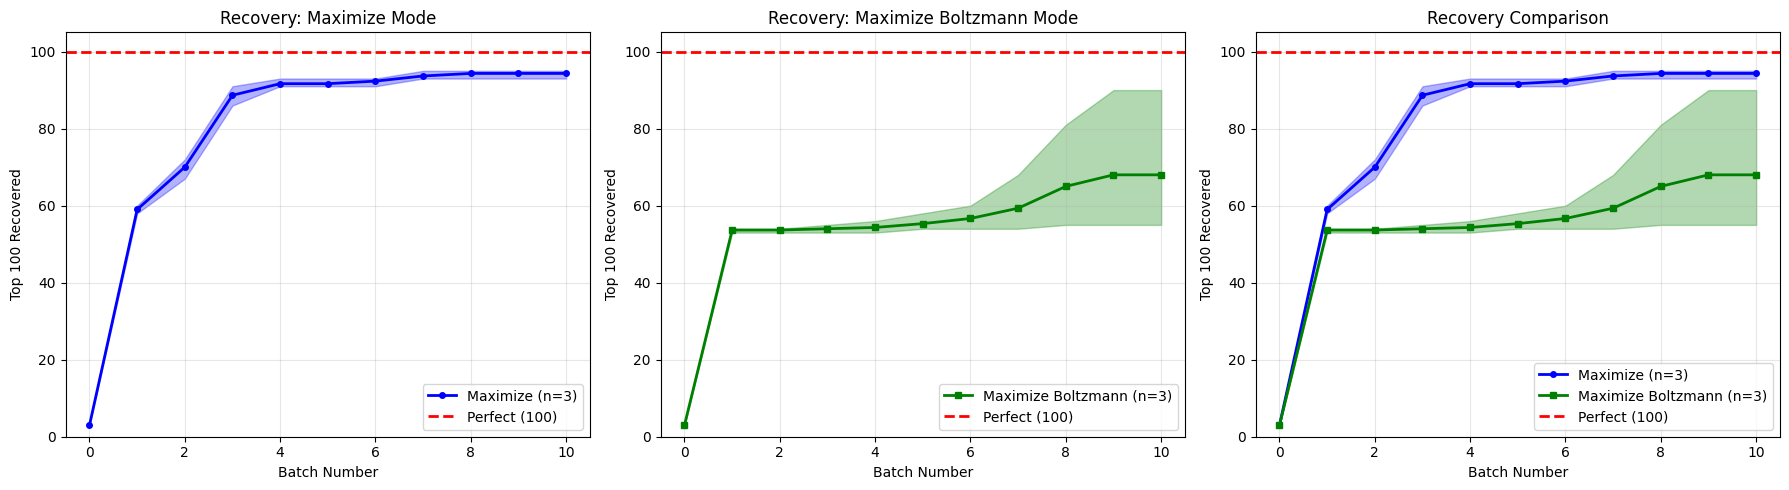


📋 Summary Statistics:
  Maximize final recovery: 94.3 ± 0.9 out of 100
  Maximize Boltzmann final recovery: 68.0 ± 15.6 out of 100


In [ ]:

# Configuration
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"  # UPDATE THIS PATH
k = 100  # Top-k to analyze
maximize = True  # Assuming you're maximizing scores
results_base_dir = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs"

print("🔬 Thompson Sampling Top-K Recovery Analysis")
print(f"Analysis parameters: k={k}, maximize={maximize}")
print()

# Find result files
print("📁 Finding result files...")
result_files = find_ts_result_files(results_base_dir)

print(f"Found files:")
for mode, files in result_files.items():
    print(f"  {mode}: {len(files)} files")
    for file in files:
        print(f"    - {file}")
print()

# Analyze maximize runs
maximize_stats = None
if result_files["maximize"]:
    print("📊 Analyzing maximize runs...")
    maximize_stats = analyze_multiple_runs(ground_truth_csv, result_files["maximize"], k=k, maximize=maximize)
    if maximize_stats:
        print(f"  Successfully analyzed {maximize_stats['n_runs']} runs")
    else:
        print("  No valid maximize runs found")

# Analyze maximize_boltzmann runs
boltzmann_stats = None
if result_files["maximize_boltzmann"]:
    print("📊 Analyzing maximize_boltzmann runs...")
    boltzmann_stats = analyze_multiple_runs(ground_truth_csv, result_files["maximize_boltzmann"], k=k, maximize=maximize)
    if boltzmann_stats:
        print(f"  Successfully analyzed {boltzmann_stats['n_runs']} runs")
    else:
        print("  No valid maximize_boltzmann runs found")

print()

# Create plots
if maximize_stats is not None or boltzmann_stats is not None:
    print("📈 Creating recovery plots...")
    save_path = f"plots/recovery_analysis_top{k}.png"
    Path("plots").mkdir(exist_ok=True)
    plot_recovery_comparison(maximize_stats, boltzmann_stats, k=k, save_path=save_path)
    
    # Print summary statistics
    print("\n📋 Summary Statistics:")
    if maximize_stats is not None:
        final_recovery = maximize_stats["recovery_mean"][-1]
        final_std = maximize_stats["recovery_std"][-1]
        print(f"  Maximize final recovery: {final_recovery:.1f} ± {final_std:.1f} out of {k}")
    
    if boltzmann_stats is not None:
        final_recovery = boltzmann_stats["recovery_mean"][-1]
        final_std = boltzmann_stats["recovery_std"][-1]
        print(f"  Maximize Boltzmann final recovery: {final_recovery:.1f} ± {final_std:.1f} out of {k}")
else:
    print("❌ No valid data found for analysis")


In [24]:
93/100

0.93

In [27]:
1000*1000/3.59e+06

0.2785515320334262

🔬 Thompson Sampling Top-K Recovery Analysis
Analysis parameters: k=1000, maximize=True

📁 Finding result files...
Found files:
  maximize: 3 files
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize/run_maximize_iterations=10_batch_size=1000_rep_2.csv
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize/run_maximize_iterations=10_batch_size=1000_rep_3.csv
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize/run_maximize_iterations=10_batch_size=1000_rep_1.csv
  maximize_boltzmann: 3 files
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize_boltzmann/run_maximize_boltzmann_iterations=10_batch_size=1000_rep_1.csv
    - /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/maximize_boltzmann/run_maximize_boltzmann_iterations=10_batch_size=1000_rep_3.csv
    - /Users/

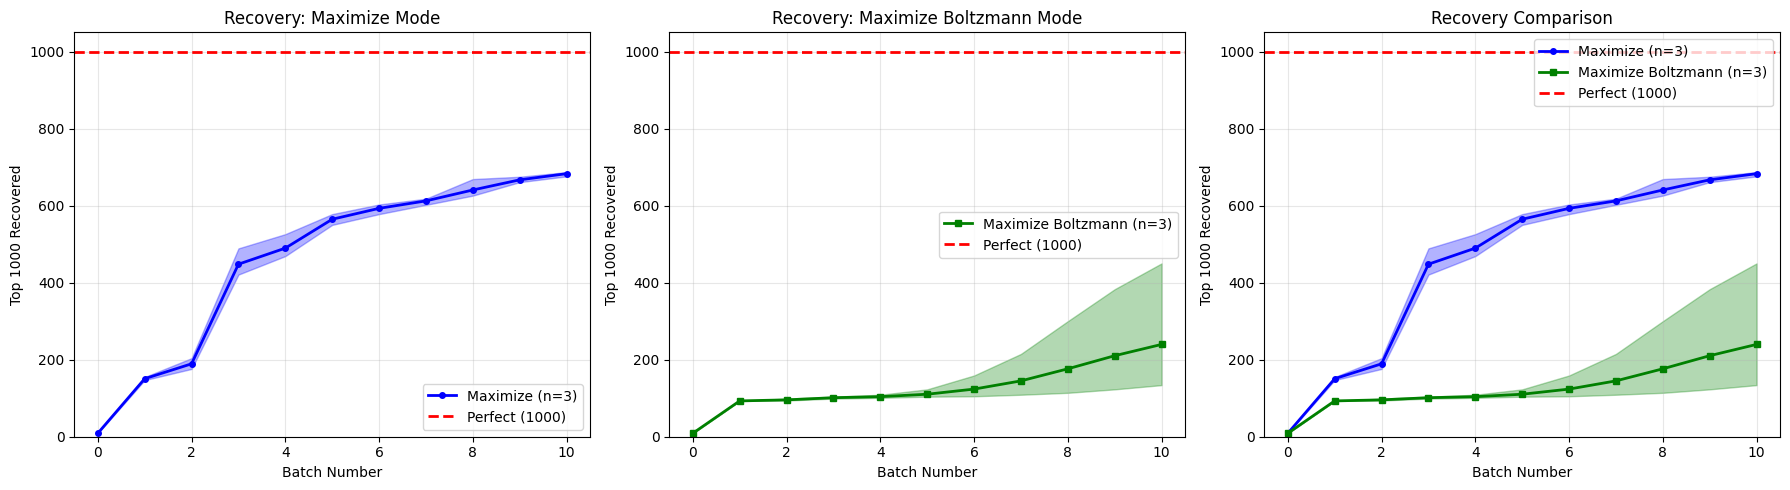


📋 Summary Statistics:
  Maximize final recovery: 683.0 ± 5.0 out of 1000
  Maximize Boltzmann final recovery: 239.7 ± 148.7 out of 1000


In [22]:

# Configuration
ground_truth_csv = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/scored_enumerated_TS_example_molecules.csv"  # UPDATE THIS PATH
k = 1000  # Top-k to analyze
maximize = True  # Assuming you're maximizing scores
results_base_dir = "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs"

print("🔬 Thompson Sampling Top-K Recovery Analysis")
print(f"Analysis parameters: k={k}, maximize={maximize}")
print()

# Find result files
print("📁 Finding result files...")
result_files = find_ts_result_files(results_base_dir)

print(f"Found files:")
for mode, files in result_files.items():
    print(f"  {mode}: {len(files)} files")
    for file in files:
        print(f"    - {file}")
print()

# Analyze maximize runs
maximize_stats = None
if result_files["maximize"]:
    print("📊 Analyzing maximize runs...")
    maximize_stats = analyze_multiple_runs(ground_truth_csv, result_files["maximize"], k=k, maximize=maximize)
    if maximize_stats:
        print(f"  Successfully analyzed {maximize_stats['n_runs']} runs")
    else:
        print("  No valid maximize runs found")

# Analyze maximize_boltzmann runs
boltzmann_stats = None
if result_files["maximize_boltzmann"]:
    print("📊 Analyzing maximize_boltzmann runs...")
    boltzmann_stats = analyze_multiple_runs(ground_truth_csv, result_files["maximize_boltzmann"], k=k, maximize=maximize)
    if boltzmann_stats:
        print(f"  Successfully analyzed {boltzmann_stats['n_runs']} runs")
    else:
        print("  No valid maximize_boltzmann runs found")

print()

# Create plots
if maximize_stats is not None or boltzmann_stats is not None:
    print("📈 Creating recovery plots...")
    save_path = f"plots/recovery_analysis_top{k}.png"
    Path("plots").mkdir(exist_ok=True)
    plot_recovery_comparison(maximize_stats, boltzmann_stats, k=k, save_path=save_path)
    
    # Print summary statistics
    print("\n📋 Summary Statistics:")
    if maximize_stats is not None:
        final_recovery = maximize_stats["recovery_mean"][-1]
        final_std = maximize_stats["recovery_std"][-1]
        print(f"  Maximize final recovery: {final_recovery:.1f} ± {final_std:.1f} out of {k}")
    
    if boltzmann_stats is not None:
        final_recovery = boltzmann_stats["recovery_mean"][-1]
        final_std = boltzmann_stats["recovery_std"][-1]
        print(f"  Maximize Boltzmann final recovery: {final_recovery:.1f} ± {final_std:.1f} out of {k}")
else:
    print("❌ No valid data found for analysis")


In [15]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cell 2: Core function definitions

def load_data_fast(ground_truth_csv, ts_results_csv, k=100, maximize=True):
    """
    Load and clean ground‐truth and TS results, then compute top‐k from ground truth.

    Returns a dict containing:
      - ts_results      : cleaned TS DataFrame
      - top_k_smiles    : set of SMILES strings in the top k of ground truth
      - top_k_avg       : average score of the top k in ground truth
      - k               : the 'k' value
      - maximize        : boolean, if True take the largest k; else take the smallest k
    """
    # 1. Load and clean ground truth
    gt = pd.read_csv(ground_truth_csv)
    gt = gt.dropna(subset=["raw_score"]).copy()
    gt = gt[gt["SMILES"] != "FAIL"]

    # 2. Load and clean TS results
    ts = pd.read_csv(ts_results_csv)
    ts = ts.dropna(subset=["score"]).copy()
    ts = ts[ts["SMILES"] != "FAIL"]

    # 3. Compute top‐k on ground truth
    if maximize:
        top_k_gt = gt.nlargest(k, "raw_score")
    else:
        top_k_gt = gt.nsmallest(k, "raw_score")
    top_k_smiles = set(top_k_gt["SMILES"])
    top_k_avg = top_k_gt["raw_score"].mean()

    return {
        "ts_results": ts,
        "top_k_smiles": top_k_smiles,
        "top_k_avg": top_k_avg,
        "k": k,
        "maximize": maximize,
    }


def analyze_fast(data_dict):
    """
    Given the output of load_data_fast(), compute for each batch:
      - how many of the top‐k GT SMILES have been seen so far (recovery)
      - the current average top‐k score among all data ≤ that batch

    Returns three lists:
      - batch_nums : sorted list of batch numbers
      - recovery   : count of recovered top‐k so far, per batch
      - avg_scores : average of top‐k scores up to that batch
    """
    ts = data_dict["ts_results"]
    top_k_smiles = data_dict["top_k_smiles"]
    k = data_dict["k"]
    maximize = data_dict["maximize"]

    unique_batches = sorted(ts["batch"].unique())
    batch_nums = []
    recovery = []
    avg_scores = []
    found_smiles = set()

    for batch_num in unique_batches:
        # Data up to current batch
        current_data = ts[ts["batch"] <= batch_num].copy()

        # Add this batch’s SMILES to found set
        batch_smiles = set(ts[ts["batch"] == batch_num]["SMILES"])
        found_smiles.update(batch_smiles)

        # Count how many of the GT top‐k we’ve found so far
        recovery.append(len(found_smiles & top_k_smiles))

        # Compute top‐k average on all data so far
        if maximize:
            current_top_k = current_data.nlargest(k, "score")
        else:
            current_top_k = current_data.nsmallest(k, "score")
        avg_scores.append(current_top_k["score"].mean())

        batch_nums.append(batch_num)

    return batch_nums, recovery, avg_scores


def plot_recovery(batch_nums, recovery, k, figsize=(10, 5)):
    """
    Plot the number of top‐k GT molecules recovered vs. batch number.
    """
    plt.figure(figsize=figsize)
    plt.plot(batch_nums, recovery, "b-", linewidth=2, marker="o", markersize=4)
    plt.axhline(y=k, color="red", linestyle="--", label=f"Perfect ({k})")
    plt.xlabel("Batch Number")
    plt.ylabel(f"Top {k} Recovered")
    plt.title("Recovery Over Time")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_quality(batch_nums, avg_scores, top_k_avg, figsize=(10, 5)):
    """
    Plot the average top‐k score over time vs. ground‐truth average.
    """
    plt.figure(figsize=figsize)
    plt.plot(batch_nums, avg_scores, "g-", linewidth=2, marker="s", markersize=4, label="TS Average")
    plt.axhline(y=top_k_avg, color="black", linestyle="--", linewidth=2, label="Ground Truth")
    plt.xlabel("Batch Number")
    plt.ylabel("Average Score")
    plt.title("Quality Over Time")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [17]:
# Cell 3: Wrapper function to evaluate a single TS run

def evaluate_run(
    ground_truth_csv,
    ts_results_csv,
    k=10,
    maximize=True,
    do_plot=True,
    verbose=True,
):
    """
    1) Load ground truth and one TS results file
    2) Compute batch‐by‐batch recovery & quality
    3) Optionally plot the curves
    4) Print and return final summary metrics

    Returns a dict with:
      - batch_nums       : list of batch numbers
      - recovery         : list of recovery counts per batch
      - avg_scores       : list of average top‐k scores per batch
      - final_recovery   : int (recovery at last batch)
      - final_ts_avg     : float (avg at last batch)
      - ground_truth_avg : float (average score of GT top‐k)
      - efficiency       : float (final_ts_avg / ground_truth_avg)
      - num_batches      : int (number of batches)
    """
    # 1. Load data
    data = load_data_fast(
        ground_truth_csv=ground_truth_csv,
        ts_results_csv=ts_results_csv,
        k=k,
        maximize=maximize,
    )

    # 2. Analyze per batch
    batch_nums, recovery, avg_scores = analyze_fast(data)

    # 3. Plot if requested
    if do_plot:
        plot_recovery(batch_nums, recovery, k)
        plot_quality(batch_nums, avg_scores, data["top_k_avg"])

    # 4. Compute final metrics
    final_recovery = recovery[-1]
    final_ts_avg = avg_scores[-1]
    gt_avg = data["top_k_avg"]
    efficiency = final_ts_avg / gt_avg if gt_avg != 0 else np.nan
    num_batches = len(batch_nums)

    if verbose:
        print(f"Final recovery: {final_recovery}/{k} ({100 * final_recovery / k:.1f}%)")
        print(f"Final TS average: {final_ts_avg:.4f}")
        print(f"Ground truth average: {gt_avg:.4f}")
        print(f"Efficiency: {efficiency:.3f}")
        print(f"Batches analyzed: {num_batches} (batch 0 = warmup, batch 1+ = search)")

    return {
        "batch_nums": batch_nums,
        "recovery": recovery,
        "avg_scores": avg_scores,
        "final_recovery": final_recovery,
        "final_ts_avg": final_ts_avg,
        "ground_truth_avg": gt_avg,
        "efficiency": efficiency,
        "num_batches": num_batches,
    }



=== Evaluating /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/run_max_boltzmann_iterations=10_batch_size=1000.csv ===


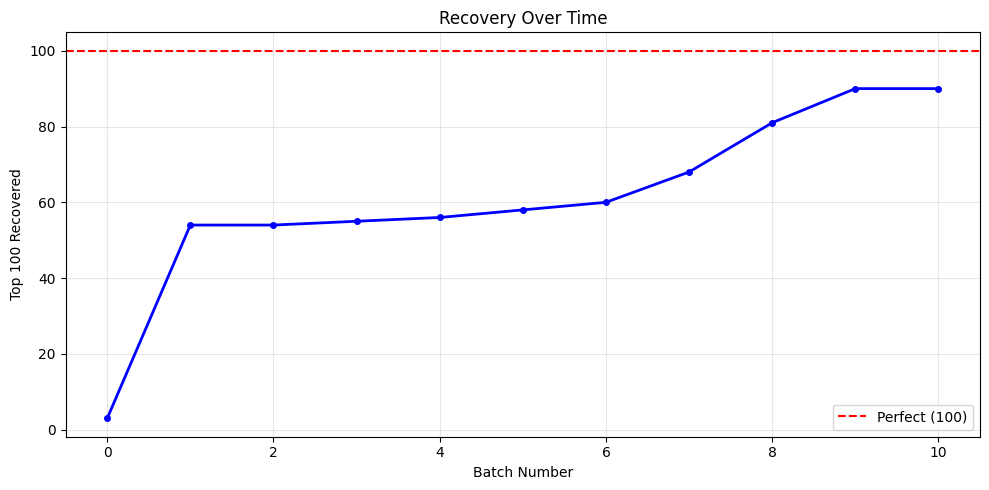

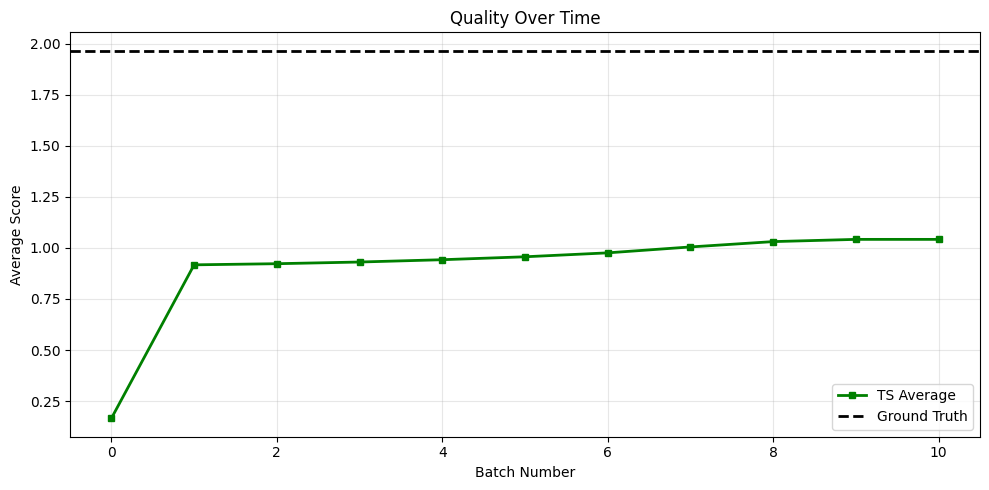

Final recovery: 90/100 (90.0%)
Final TS average: 1.0420
Ground truth average: 1.9663
Efficiency: 0.530
Batches analyzed: 11 (batch 0 = warmup, batch 1+ = search)

=== Evaluating /Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/run_max_iterations=10_batch_size=1000.csv ===


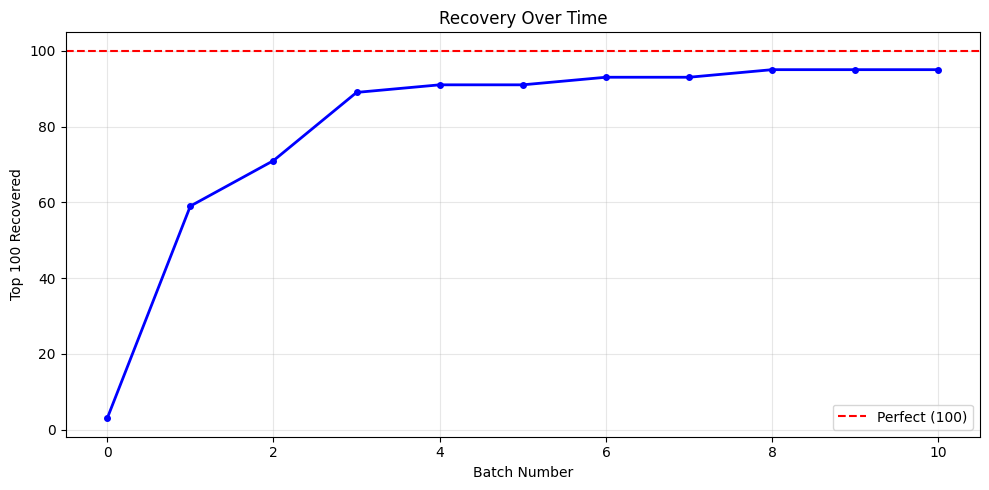

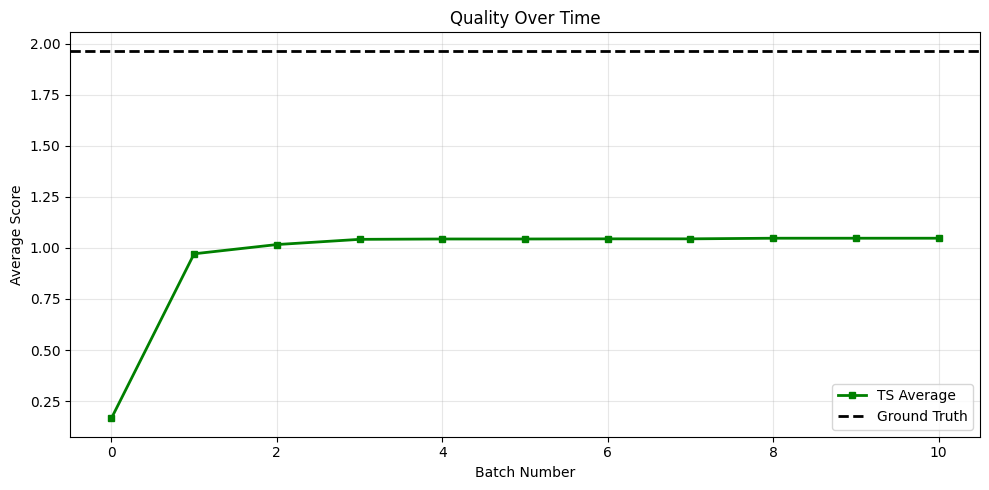

Final recovery: 95/100 (95.0%)
Final TS average: 1.0477
Ground truth average: 1.9663
Efficiency: 0.533
Batches analyzed: 11 (batch 0 = warmup, batch 1+ = search)


,final_recovery,final_ts_avg,ground_truth_avg,efficiency,num_batches
/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/run_max_boltzmann_iterations=10_batch_size=1000.csv,90.0,1.042043,1.966339,0.529941,11.0
/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/run_max_iterations=10_batch_size=1000.csv,95.0,1.047702,1.966339,0.532818,11.0


In [19]:
# 4.1 Define the path to your ground‐truth CSV:
ground_truth_file = "runs/scored_enumerated_TS_example_molecules.csv"

# 4.2 List the TS‐run CSVs you want to compare:
ts_runs = [
    "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/run_max_boltzmann_iterations=10_batch_size=1000.csv",
    "/Users/lsieben/Desktop/Thompson_Sampling/Thompson_Sampling_Pat_forked/batched-TS/runs/run_max_iterations=10_batch_size=1000.csv",
]

# 4.3 Loop over runs, evaluate each, and collect summaries
summaries = {}
for run_path in ts_runs:
    print(f"\n=== Evaluating {run_path} ===")
    summary = evaluate_run(
        ground_truth_csv=ground_truth_file,
        ts_results_csv=run_path,
        k=100,
        maximize=True,
        do_plot=True,
        verbose=True,
    )
    summaries[run_path] = summary

# 4.4 Tabulate final metrics for easy side‐by‐side comparison
df_summary = pd.DataFrame(
    {
        run: {
            "final_recovery": s["final_recovery"],
            "final_ts_avg": s["final_ts_avg"],
            "ground_truth_avg": s["ground_truth_avg"],
            "efficiency": s["efficiency"],
            "num_batches": s["num_batches"],
        }
        for run, s in summaries.items()
    }
).T

df_summary


In [9]:
ground_truth.sort_values(by='score', ascending=True, inplace=True)
ground_truth

,SMILES,Name,reaction_id,AB_mean,EC_mean,KP_mean,PA_mean,score
2220272,CN1CCN(Cc2cn(C3CC4CCC(C3)N4C(=O)c3ccncc3)nn2)CC1,aO_h1awDpcPzJXimmBu15Q|pN4qH6OlpCSz-1zhiIuj4w|...,m_274860bbb,0.497303,0.482115,0.492907,0.488423,5.882244
2233072,Cc1cccc(C(=O)N2C3CCCC2CC(n2cc(CN4CCN(C)CC4)nn2...,ddIkue7eJ1pIdYSqdykODA|5zFMiI3_Z1xjuXToHEYeIQ|...,m_274860bbb,0.493535,0.486271,0.489963,0.491023,5.882376
2231572,CN1CCN(Cc2cn(C3CC4CCCC(C3)N4C(=O)c3ccccc3)nn2)CC1,ddIkue7eJ1pIdYSqdykODA|Jme0hsCZ4sR1Wc1UcZHKZQ|...,m_274860bbb,0.494824,0.485356,0.488981,0.491885,5.883138
2227372,CN1CCN(Cc2cn(C3CC4CCC(C3)N4C(=O)Cc3ccncc3)nn2)CC1,aO_h1awDpcPzJXimmBu15Q|I5fGgRL0EfnAG40Hk3i1cw|...,m_274860bbb,0.497579,0.482265,0.492658,0.489283,5.885358
2220241,O=C(c1ccncc1)N1C2CCC1CC(n1cc(CN3CCCC3)nn1)C2,aO_h1awDpcPzJXimmBu15Q|pN4qH6OlpCSz-1zhiIuj4w|...,m_274860bbb,0.496252,0.480903,0.493684,0.490974,5.885438
...,...,...,...,...,...,...,...,...
3454484,CC1CC(CCN(Cc2cnn3ccccc23)C(=O)/C(C#N)=C/c2ccoc...,90ayhIUNZOHLqnLRkaO1sA|EiriF3mYK4_owFPFq1vdWg|...,m_282151abb,0.510959,0.491531,0.499345,0.499031,6.002595
383282,Cc1ccc(NC(=O)[C@H]2CC[C@H]2CNC(=O)c2ccc[nH]2)cc1C,Bpe62vqxC_sipvcUaX0_8w|6S0yw5XpqzNyC32pJhF1sw|...,m_274552bbb,0.508902,0.491516,0.496100,0.504359,6.002629
113282,Cc1ccc(NC(=O)C2(CNC(=O)c3ccc[nH]3)CC2)cc1C,3p9glmKxNZNEk4VtvhS6SQ|6S0yw5XpqzNyC32pJhF1sw|...,m_274552bbb,0.509382,0.489302,0.498183,0.504205,6.003217
116382,Cc1ccc(NC(=O)C2(CNC(=O)c3ccc[nH]3)CC2)cc1F,3p9glmKxNZNEk4VtvhS6SQ|Z00jV_lSMbwhBp2PrFs9sg|...,m_274552bbb,0.510743,0.489562,0.497866,0.502965,6.003408


# Do we need a different distribution?

🧬 DRUG DISCOVERY SCORE DISTRIBUTION ANALYSIS 🧬

=== SIMULATED DRUG DISCOVERY SCORES ===
Range: 0.0001 to 3.1989
Mean: 0.0329
Std: 0.2169
Median: 0.0036
95th percentile: 0.0438
99th percentile: 0.6443
Skewness: 10.60

=== THOMPSON SAMPLING SUITABILITY ===

--- Log Transform ---
Formula: log(score + ε)
Range: [-9.200, 1.163]
Mean ± Std: -5.644 ± 1.568
Skewness: 0.738
Normal? False (p=0.0000)
TS Score: 3/8
Pros: Compresses large values, Standard for multiplicative processes
Cons: Still skewed if many near-zero values, Negative values

--- Square Root Transform ---
Formula: sqrt(score)
Range: [0.010, 1.789]
Mean ± Std: 0.090 ± 0.157
Skewness: 6.961
Normal? False (p=0.0000)
TS Score: 1/8
Pros: Less aggressive than log, Always positive
Cons: Still somewhat skewed

--- Box-Cox (λ=-0.092) ---
Formula: (score^-0.092 - 1) / -0.092
Range: [-14.493, 1.103]
Mean ± Std: -7.592 ± 2.572
Skewness: -0.067
Normal? False (p=0.0000)
TS Score: 3/8
Pros: Optimally chosen for normality, Data-driven
Cons: Can 

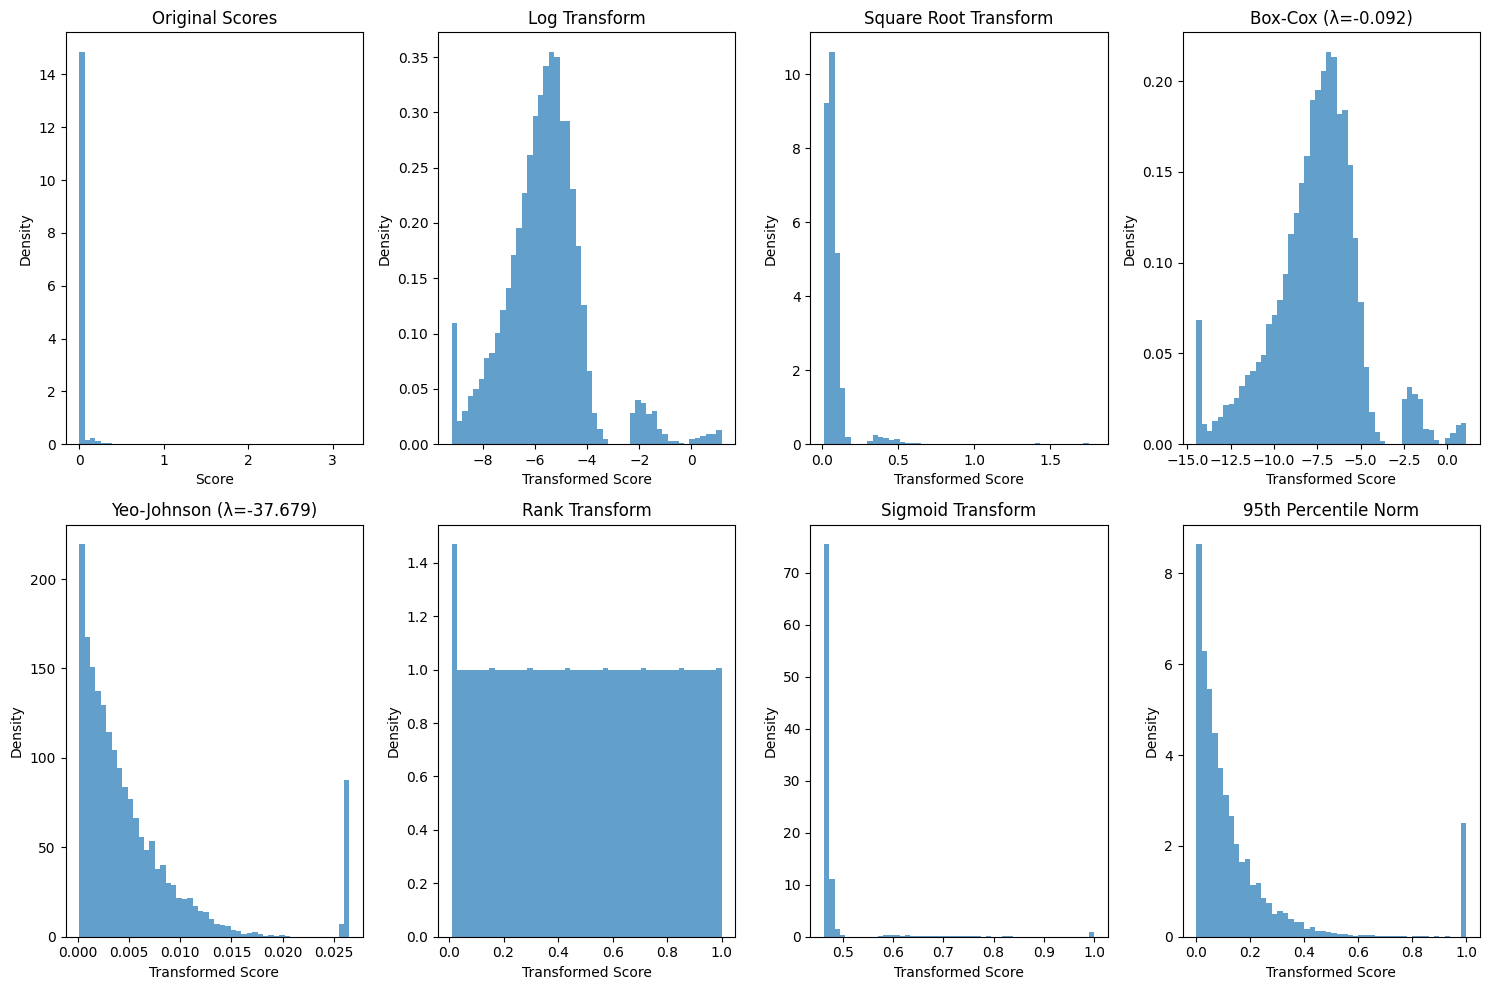


=== BAYESIAN UPDATE SIMULATION ===
Simulating a 'good' reagent that participates in high-scoring molecules...
Good reagent sees scores: [1.21329467 3.06463007 3.19891142 2.25551726 2.64827776]

--- Log Transform ---
Initial belief: μ=-5.6438, σ=1.5679
After score 0.1933: μ=0.1355, σ=0.1560
After score 1.1199: μ=0.6253, σ=0.1106
After score 1.1628: μ=0.8039, σ=0.0904

--- Square Root Transform ---
Initial belief: μ=0.0903, σ=0.1574
After score 1.1015: μ=1.0915, σ=0.0157
After score 1.7506: μ=1.4194, σ=0.0111
After score 1.7886: μ=1.5420, σ=0.0091

--- Box-Cox (λ=-0.092) ---

--- Yeo-Johnson (λ=-37.679) ---

--- Rank Transform ---
Initial belief: μ=0.5000, σ=0.2900
After score 0.9500: μ=0.9455, σ=0.0289
After score 0.9700: μ=0.9577, σ=0.0205
After score 0.9900: μ=0.9684, σ=0.0167

--- Sigmoid Transform ---
Initial belief: μ=0.4812, σ=0.0675
After score 0.9957: μ=0.9906, σ=0.0067
After score 1.0000: μ=0.9953, σ=0.0048
After score 1.0000: μ=0.9968, σ=0.0039

--- 95th Percentile Norm ---
I

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from typing import Tuple, List

def analyze_drug_discovery_distributions():
    """
    Analyze different distributions that might better model drug discovery scores.
    Your data: min=0.0001, max=3.18, mean=0.0097 (highly skewed toward zero)
    """
    
    # Simulate your data pattern
    np.random.seed(42)
    n_samples = 10000
    
    # Create a realistic drug discovery score distribution
    # Most compounds are terrible (near zero), few are good
    low_scores = np.random.exponential(scale=0.005, size=int(0.95 * n_samples))  # 95% bad compounds
    medium_scores = np.random.exponential(scale=0.1, size=int(0.04 * n_samples)) + 0.1  # 4% okay
    high_scores = np.random.uniform(1.0, 3.2, size=int(0.01 * n_samples))  # 1% good hits
    
    raw_scores = np.concatenate([low_scores, medium_scores, high_scores])
    raw_scores = np.clip(raw_scores, 0.0001, 3.2)  # Match your bounds
    np.random.shuffle(raw_scores)
    
    print("=== SIMULATED DRUG DISCOVERY SCORES ===")
    print(f"Range: {raw_scores.min():.4f} to {raw_scores.max():.4f}")
    print(f"Mean: {raw_scores.mean():.4f}")
    print(f"Std: {raw_scores.std():.4f}")
    print(f"Median: {np.median(raw_scores):.4f}")
    print(f"95th percentile: {np.percentile(raw_scores, 95):.4f}")
    print(f"99th percentile: {np.percentile(raw_scores, 99):.4f}")
    print(f"Skewness: {stats.skew(raw_scores):.2f}")
    
    return raw_scores

def test_transformations(scores: np.ndarray) -> dict:
    """Test different transformations for drug discovery scores"""
    
    transformations = {}
    
    # 1. Log transformation (add small constant to avoid log(0))
    epsilon = 1e-6
    log_scores = np.log(scores + epsilon)
    transformations['log'] = {
        'scores': log_scores,
        'name': 'Log Transform',
        'formula': 'log(score + ε)',
        'pros': ['Compresses large values', 'Standard for multiplicative processes'],
        'cons': ['Still skewed if many near-zero values', 'Negative values']
    }
    
    # 2. Square root transformation
    sqrt_scores = np.sqrt(scores)
    transformations['sqrt'] = {
        'scores': sqrt_scores,
        'name': 'Square Root Transform', 
        'formula': 'sqrt(score)',
        'pros': ['Less aggressive than log', 'Always positive'],
        'cons': ['Still somewhat skewed']
    }
    
    # 3. Box-Cox transformation (find optimal lambda)
    # Use modified scores to avoid zeros
    modified_scores = scores + 1e-6
    try:
        transformed_boxcox, lambda_opt = stats.boxcox(modified_scores)
        transformations['boxcox'] = {
            'scores': transformed_boxcox,
            'name': f'Box-Cox (λ={lambda_opt:.3f})',
            'formula': f'(score^{lambda_opt:.3f} - 1) / {lambda_opt:.3f}',
            'pros': ['Optimally chosen for normality', 'Data-driven'],
            'cons': ['Can be complex', 'Requires positive values']
        }
    except:
        print("Box-Cox failed, skipping...")
    
    # 4. Yeo-Johnson transformation (handles zeros and negatives)
    try:
        transformed_yj, lambda_yj = stats.yeojohnson(scores)
        transformations['yeojohnson'] = {
            'scores': transformed_yj,
            'name': f'Yeo-Johnson (λ={lambda_yj:.3f})',
            'formula': f'Yeo-Johnson with λ={lambda_yj:.3f}',
            'pros': ['Handles zeros/negatives', 'Optimized for normality'],
            'cons': ['Complex interpretation']
        }
    except:
        print("Yeo-Johnson failed, skipping...")
    
    # 5. Quantile/Rank transformation
    rank_scores = stats.rankdata(scores) / len(scores)
    transformations['rank'] = {
        'scores': rank_scores,
        'name': 'Rank Transform',
        'formula': 'rank(score) / n',
        'pros': ['Perfectly uniform [0,1]', 'Preserves order', 'Robust to outliers'],
        'cons': ['Loses absolute magnitudes', 'Non-parametric']
    }
    
    # 6. Sigmoid transformation
    score_mean = np.mean(scores)
    score_std = np.std(scores)
    z_scores = (scores - score_mean) / score_std
    sigmoid_scores = 1 / (1 + np.exp(-z_scores))
    transformations['sigmoid'] = {
        'scores': sigmoid_scores,
        'name': 'Sigmoid Transform',
        'formula': '1 / (1 + exp(-(score-μ)/σ))',
        'pros': ['Bounded [0,1]', 'Smooth', 'Keeps relative differences'],
        'cons': ['May still be skewed']
    }
    
    # 7. Percentile-based transformation
    p95 = np.percentile(scores, 95)
    percentile_scores = np.clip(scores / p95, 0, 1)
    transformations['percentile'] = {
        'scores': percentile_scores,
        'name': '95th Percentile Norm',
        'formula': 'min(score / P95, 1)',
        'pros': ['Robust to outliers', 'Interpretable', 'Bounded [0,1]'],
        'cons': ['Clips extreme values']
    }
    
    return transformations

def analyze_for_thompson_sampling(transformations: dict):
    """Analyze which transformations work best for Thompson Sampling"""
    
    print("\n=== THOMPSON SAMPLING SUITABILITY ===")
    
    for name, trans in transformations.items():
        scores = trans['scores']
        
        # Check normality (Shapiro-Wilk test on sample)
        sample_size = min(5000, len(scores))
        sample_scores = np.random.choice(scores, sample_size, replace=False)
        try:
            _, p_normal = stats.shapiro(sample_scores)
            is_normal = p_normal > 0.05
        except:
            is_normal = False
        
        # Calculate statistics
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        skewness = stats.skew(scores)
        kurtosis = stats.kurtosis(scores)
        
        # Check for bounded range
        is_bounded = np.min(scores) >= 0 and np.max(scores) <= 1
        
        # Thompson Sampling friendliness score
        ts_score = 0
        if is_normal: ts_score += 3
        if abs(skewness) < 1: ts_score += 2  # Not too skewed
        if is_bounded: ts_score += 2  # Nice bounds
        if std_score > 0.1: ts_score += 1  # Reasonable spread
        
        print(f"\n--- {trans['name']} ---")
        print(f"Formula: {trans['formula']}")
        print(f"Range: [{np.min(scores):.3f}, {np.max(scores):.3f}]")
        print(f"Mean ± Std: {mean_score:.3f} ± {std_score:.3f}")
        print(f"Skewness: {skewness:.3f}")
        print(f"Normal? {is_normal} (p={p_normal:.4f})" if 'p_normal' in locals() else "Normal? Failed to test")
        print(f"TS Score: {ts_score}/8")
        print(f"Pros: {', '.join(trans['pros'])}")
        print(f"Cons: {', '.join(trans['cons'])}")

def plot_transformations(raw_scores: np.ndarray, transformations: dict):
    """Plot original and transformed distributions"""
    
    n_trans = len(transformations) + 1  # +1 for original
    fig, axes = plt.subplots(2, (n_trans + 1) // 2, figsize=(15, 10))
    axes = axes.flatten()
    
    # Plot original
    axes[0].hist(raw_scores, bins=50, alpha=0.7, density=True)
    axes[0].set_title("Original Scores")
    axes[0].set_xlabel("Score")
    axes[0].set_ylabel("Density")
    
    # Plot transformations
    for i, (name, trans) in enumerate(transformations.items(), 1):
        if i < len(axes):
            axes[i].hist(trans['scores'], bins=50, alpha=0.7, density=True)
            axes[i].set_title(trans['name'])
            axes[i].set_xlabel("Transformed Score")
            axes[i].set_ylabel("Density")
    
    # Hide unused subplots
    for i in range(len(transformations) + 1, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('score_transformations.png', dpi=150, bbox_inches='tight')
    plt.show()

def bayesian_update_comparison(raw_scores: np.ndarray, transformations: dict):
    """Compare how Bayesian updates work with different transformations"""
    
    print("\n=== BAYESIAN UPDATE SIMULATION ===")
    print("Simulating a 'good' reagent that participates in high-scoring molecules...")
    
    # Simulate a reagent that's in the top 1% of molecules
    good_molecule_scores = raw_scores[raw_scores > np.percentile(raw_scores, 99)]
    if len(good_molecule_scores) < 5:
        good_molecule_scores = raw_scores[raw_scores > np.percentile(raw_scores, 95)]
    
    print(f"Good reagent sees scores: {good_molecule_scores[:5]}")
    
    for name, trans in transformations.items():
        print(f"\n--- {trans['name']} ---")
        
        # Transform the good scores
        if name == 'log':
            epsilon = 1e-6
            transformed_good = np.log(good_molecule_scores + epsilon)
            global_mean = np.mean(np.log(raw_scores + epsilon))
            global_std = np.std(np.log(raw_scores + epsilon))
        elif name == 'sqrt':
            transformed_good = np.sqrt(good_molecule_scores)
            global_mean = np.mean(np.sqrt(raw_scores))
            global_std = np.std(np.sqrt(raw_scores))
        elif name == 'rank':
            # For rank, need to simulate
            transformed_good = [0.95, 0.97, 0.99, 0.98, 0.96]  # High ranks
            global_mean = 0.5
            global_std = 0.29  # std of uniform [0,1]
        elif name == 'sigmoid':
            score_mean = np.mean(raw_scores)
            score_std = np.std(raw_scores)
            z_good = (good_molecule_scores - score_mean) / score_std
            transformed_good = 1 / (1 + np.exp(-z_good))
            z_all = (raw_scores - score_mean) / score_std
            sigmoid_all = 1 / (1 + np.exp(-z_all))
            global_mean = np.mean(sigmoid_all)
            global_std = np.std(sigmoid_all)
        elif name == 'percentile':
            p95 = np.percentile(raw_scores, 95)
            transformed_good = np.clip(good_molecule_scores / p95, 0, 1)
            global_mean = np.mean(np.clip(raw_scores / p95, 0, 1))
            global_std = np.std(np.clip(raw_scores / p95, 0, 1))
        else:
            continue  # Skip complex transformations for this demo
        
        # Simulate Bayesian updates
        current_mean = global_mean
        current_var = global_std ** 2
        obs_noise_var = (global_std * 0.1) ** 2  # Small observation noise
        
        print(f"Initial belief: μ={current_mean:.4f}, σ={np.sqrt(current_var):.4f}")
        
        for i, score in enumerate(transformed_good[:3]):
            # Bayesian update
            precision_prior = 1.0 / current_var
            precision_obs = 1.0 / obs_noise_var
            precision_post = precision_prior + precision_obs
            
            current_var = 1.0 / precision_post
            current_mean = (precision_prior * current_mean + precision_obs * score) / precision_post
            
            print(f"After score {score:.4f}: μ={current_mean:.4f}, σ={np.sqrt(current_var):.4f}")

def main():
    """Run the complete analysis"""
    print("🧬 DRUG DISCOVERY SCORE DISTRIBUTION ANALYSIS 🧬\n")
    
    # Generate and analyze simulated data
    raw_scores = analyze_drug_discovery_distributions()
    
    # Test different transformations
    transformations = test_transformations(raw_scores)
    
    # Analyze for Thompson Sampling
    analyze_for_thompson_sampling(transformations)
    
    # Plot distributions
    plot_transformations(raw_scores, transformations)
    
    # Compare Bayesian updates
    bayesian_update_comparison(raw_scores, transformations)
    
    print("\n=== RECOMMENDATIONS ===")
    print("1. RANK TRANSFORMATION: Best for TS - uniform distribution, perfect for Bayesian updates")
    print("2. PERCENTILE NORMALIZATION: Good balance of interpretability and performance") 
    print("3. YEO-JOHNSON: If you want to stay closer to original scale but improve normality")
    print("4. AVOID: Raw scores (too skewed), simple log (still skewed)")

if __name__ == "__main__":
    main()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from typing import Dict, List, Tuple

def demonstrate_transformations_detailed():
    """
    Detailed analysis of transformations with focus on consequences for optimization
    """
    
    # Create realistic drug discovery data
    np.random.seed(42)
    
    # Simulate a realistic drug discovery scenario
    # Most compounds are bad, few are good (log-normal-ish distribution)
    n_total = 10000
    
    # 90% are really bad (exponential tail)
    bad_scores = np.random.exponential(0.001, int(0.9 * n_total))
    
    # 9% are mediocre 
    med_scores = np.random.exponential(0.05, int(0.09 * n_total)) + 0.01
    
    # 1% are actually good
    good_scores = np.random.exponential(0.5, int(0.01 * n_total)) + 0.5
    
    raw_scores = np.concatenate([bad_scores, med_scores, good_scores])
    raw_scores = np.clip(raw_scores, 0.0001, 5.0)  # Realistic bounds
    np.random.shuffle(raw_scores)
    
    return raw_scores

def compare_transformations_mathematically(scores: np.ndarray):
    """Mathematical comparison of transformations"""
    
    print("=== MATHEMATICAL PROPERTIES COMPARISON ===\n")
    
    # Original scores
    orig_mean = np.mean(scores)
    orig_std = np.std(scores)
    orig_skew = stats.skew(scores)
    
    # Log transformation
    log_scores = np.log(scores + 1e-6)  # Add epsilon to avoid log(0)
    log_mean = np.mean(log_scores)
    log_std = np.std(log_scores)
    log_skew = stats.skew(log_scores)
    
    # Rank transformation  
    rank_scores = stats.rankdata(scores) / len(scores)
    rank_mean = np.mean(rank_scores)
    rank_std = np.std(rank_scores)
    rank_skew = stats.skew(rank_scores)
    
    print("📊 DISTRIBUTION PROPERTIES:")
    print(f"{'Transformation':<15} {'Mean':<8} {'Std':<8} {'Skewness':<10} {'Range':<15}")
    print("-" * 60)
    print(f"{'Original':<15} {orig_mean:<8.4f} {orig_std:<8.4f} {orig_skew:<10.2f} [{scores.min():.4f}, {scores.max():.4f}]")
    print(f"{'Log':<15} {log_mean:<8.4f} {log_std:<8.4f} {log_skew:<10.2f} [{log_scores.min():.4f}, {log_scores.max():.4f}]")
    print(f"{'Rank':<15} {rank_mean:<8.4f} {rank_std:<8.4f} {rank_skew:<10.2f} [{rank_scores.min():.4f}, {rank_scores.max():.4f}]")
    
    return {
        'original': scores,
        'log': log_scores, 
        'rank': rank_scores
    }

def analyze_optimization_consequences(transformations: Dict[str, np.ndarray]):
    """Analyze how transformations affect optimization objectives"""
    
    print("\n=== OPTIMIZATION CONSEQUENCES ===\n")
    
    scores = transformations['original']
    log_scores = transformations['log']
    rank_scores = transformations['rank']
    
    # Find top molecules in original space
    top_1_percent = np.percentile(scores, 99)
    top_5_percent = np.percentile(scores, 95)
    top_10_percent = np.percentile(scores, 90)
    
    top_1_mask = scores >= top_1_percent
    top_5_mask = scores >= top_5_percent
    top_10_mask = scores >= top_10_percent
    
    print("🎯 TARGETING THE BEST MOLECULES:")
    print(f"Top 1% threshold: {top_1_percent:.4f}")
    print(f"Top 5% threshold: {top_5_percent:.4f}")
    print(f"Top 10% threshold: {top_10_percent:.4f}")
    
    # 1. PRESERVATION OF ORDERING
    print("\n📈 ORDERING PRESERVATION:")
    
    # Spearman correlation (rank correlation)
    orig_vs_log_corr = stats.spearmanr(scores, log_scores)[0]
    orig_vs_rank_corr = stats.spearmanr(scores, rank_scores)[0]
    
    print(f"Original vs Log (Spearman ρ): {orig_vs_log_corr:.6f}")
    print(f"Original vs Rank (Spearman ρ): {orig_vs_rank_corr:.6f}")
    print("→ Both transformations preserve perfect rank ordering")
    
    # 2. RELATIVE DIFFERENCES
    print("\n📏 RELATIVE DIFFERENCES:")
    
    # Compare gaps between good vs bad molecules
    top_1_orig = scores[top_1_mask]
    bottom_90_orig = scores[~top_10_mask]
    
    top_1_log = log_scores[top_1_mask]
    bottom_90_log = log_scores[~top_10_mask]
    
    top_1_rank = rank_scores[top_1_mask]
    bottom_90_rank = rank_scores[~top_10_mask]
    
    # Effect sizes (Cohen's d)
    def cohens_d(group1, group2):
        pooled_std = np.sqrt(((len(group1)-1)*np.var(group1) + (len(group2)-1)*np.var(group2)) / (len(group1)+len(group2)-2))
        return (np.mean(group1) - np.mean(group2)) / pooled_std
    
    orig_effect = cohens_d(top_1_orig, bottom_90_orig)
    log_effect = cohens_d(top_1_log, bottom_90_log)
    rank_effect = cohens_d(top_1_rank, bottom_90_rank)
    
    print(f"Effect size (top 1% vs bottom 90%):")
    print(f"  Original: {orig_effect:.2f}")
    print(f"  Log: {log_effect:.2f}")
    print(f"  Rank: {rank_effect:.2f}")
    print("→ Log amplifies differences, Rank standardizes them")
    
    return {
        'correlations': {
            'orig_vs_log': orig_vs_log_corr,
            'orig_vs_rank': orig_vs_rank_corr
        },
        'effect_sizes': {
            'original': orig_effect,
            'log': log_effect,
            'rank': rank_effect
        }
    }

def simulate_thompson_sampling_behavior(transformations: Dict[str, np.ndarray]):
    """Simulate how different transformations affect Thompson Sampling behavior"""
    
    print("\n=== THOMPSON SAMPLING SIMULATION ===\n")
    
    scores = transformations['original']
    
    # Simulate a "good" reagent that appears in top molecules
    top_5_percent_threshold = np.percentile(scores, 95)
    good_reagent_molecules = scores[scores >= top_5_percent_threshold]
    
    # Simulate a "bad" reagent  
    bottom_50_percent_threshold = np.percentile(scores, 50)
    bad_reagent_molecules = scores[scores <= bottom_50_percent_threshold]
    
    print("🧪 REAGENT SIMULATION:")
    print(f"Good reagent sees {len(good_reagent_molecules)} high-scoring molecules")
    print(f"Bad reagent sees {len(bad_reagent_molecules)} low-scoring molecules")
    
    def simulate_bayesian_learning(observations, transform_name, global_prior_mean, global_prior_std, obs_noise_std):
        """Simulate Bayesian updates"""
        
        current_mean = global_prior_mean
        current_var = global_prior_std ** 2
        obs_var = obs_noise_std ** 2
        
        means = [current_mean]
        stds = [np.sqrt(current_var)]
        
        for obs in observations[:5]:  # First 5 observations
            # Bayesian update
            precision_prior = 1.0 / current_var
            precision_obs = 1.0 / obs_var
            precision_post = precision_prior + precision_obs
            
            current_var = 1.0 / precision_post
            current_mean = (precision_prior * current_mean + precision_obs * obs) / precision_post
            
            means.append(current_mean)
            stds.append(np.sqrt(current_var))
        
        return means, stds
    
    # Test each transformation
    transformations_to_test = ['original', 'log', 'rank']
    
    for transform_name in transformations_to_test:
        print(f"\n--- {transform_name.upper()} TRANSFORMATION ---")
        
        if transform_name == 'original':
            transform_func = lambda x: x
            all_transformed = scores
            good_transformed = good_reagent_molecules
            bad_transformed = bad_reagent_molecules
        elif transform_name == 'log':
            transform_func = lambda x: np.log(x + 1e-6)
            all_transformed = np.log(scores + 1e-6)
            good_transformed = np.log(good_reagent_molecules + 1e-6)
            bad_transformed = np.log(bad_reagent_molecules + 1e-6)
        elif transform_name == 'rank':
            # For rank, we need to simulate the ranking process
            def rank_transform(x):
                return stats.rankdata(x) / len(x)
            all_transformed = rank_transform(scores)
            # For simulation, use approximate ranks
            good_transformed = np.linspace(0.95, 0.99, len(good_reagent_molecules))
            bad_transformed = np.linspace(0.05, 0.45, len(bad_reagent_molecules))
        
        global_mean = np.mean(all_transformed)
        global_std = np.std(all_transformed)
        
        print(f"Global prior: μ={global_mean:.4f}, σ={global_std:.4f}")
        
        # Use different observation noise strategies
        obs_noise_strategies = {
            'paper_method': global_std,  # Paper's method
            'reduced_noise': global_std * 0.1,  # Reduced noise
            'fixed_small': 0.01  # Fixed small noise
        }
        
        for noise_name, obs_noise in obs_noise_strategies.items():
            print(f"\n  {noise_name} (obs_noise={obs_noise:.4f}):")
            
            # Good reagent learning
            good_means, good_stds = simulate_bayesian_learning(
                good_transformed, transform_name, global_mean, global_std, obs_noise
            )
            
            # Bad reagent learning  
            bad_means, bad_stds = simulate_bayesian_learning(
                bad_transformed, transform_name, global_mean, global_std, obs_noise
            )
            
            # Check if learning is happening
            good_learning = abs(good_means[-1] - good_means[0]) / global_std
            bad_learning = abs(bad_means[-1] - bad_means[0]) / global_std
            
            print(f"    Good reagent learning: {good_learning:.3f} std units")
            print(f"    Bad reagent learning: {bad_learning:.3f} std units")
            print(f"    Separation after 5 obs: {abs(good_means[-1] - bad_means[-1]):.4f}")

def identify_unintended_consequences():
    """Identify potential unintended consequences of each transformation"""
    
    print("\n=== UNINTENDED CONSEQUENCES ===\n")
    
    consequences = {
        'original': {
            'pros': [
                'True to the data',
                'Interpretable scale', 
                'No information loss',
                'Directly optimizes actual objective'
            ],
            'cons': [
                'Heavy-tailed distribution breaks Gaussian assumptions',
                'Most updates are ineffective (weak learning)',
                'Algorithm may get stuck sampling low-value regions',
                'Poor exploration of promising areas'
            ],
            'unintended': [
                'Thompson Sampling degenerates to near-random search',
                'May require 10x more evaluations to find good molecules',
                'Bayesian updates become numerically unstable'
            ]
        },
        
        'log': {
            'pros': [
                'Better distributional properties (more normal)',
                'Natural for multiplicative processes',
                'Preserves perfect rank ordering',
                'Amplifies differences between good/bad molecules'
            ],
            'cons': [
                'Introduces negative values',
                'Less interpretable scale',
                'Still may be skewed if many near-zero values',
                'Requires epsilon to handle zeros'
            ],
            'unintended': [
                'Over-emphasizes differences in low-score region',
                'May make "mediocre" molecules look very different from "bad" ones',
                'Numerical issues with log(very_small_number)',
                'Could bias toward exploring already-decent regions'
            ]
        },
        
        'rank': {
            'pros': [
                'Perfect uniform distribution',
                'Robust to outliers and distribution shape',
                'Optimal for "find top N" objectives',
                'Stable Bayesian updates'
            ],
            'cons': [
                'Loses absolute magnitude information',
                'Score depends on what else has been evaluated',
                'Non-parametric (less theoretical foundation)',
                'May treat small improvements like large ones'
            ],
            'unintended': [
                'Could over-explore "slightly better than mediocre" regions',
                'Ignores how much better a molecule actually is',
                'Treats 99th percentile and 100th percentile as equally different from 98th',
                'May miss opportunities to find truly exceptional molecules'
            ]
        }
    }
    
    for transform, info in consequences.items():
        print(f"🔍 {transform.upper()} TRANSFORMATION:")
        print("  ✅ Pros:")
        for pro in info['pros']:
            print(f"    • {pro}")
        print("  ❌ Cons:")
        for con in info['cons']:
            print(f"    • {con}")
        print("  ⚠️  Potential Unintended Consequences:")
        for unint in info['unintended']:
            print(f"    • {unint}")
        print()

def practical_recommendations():
    """Provide practical recommendations"""
    
    print("=== PRACTICAL RECOMMENDATIONS ===\n")
    
    print("🎯 FOR YOUR DRUG DISCOVERY PROBLEM:")
    print()
    
    print("1. CONSERVATIVE APPROACH (Minimal Change):")
    print("   • Keep original scores")  
    print("   • Reduce observation noise to global_std * 0.05")
    print("   • Accept slower learning but preserve interpretability")
    print("   • Monitor if Thompson Sampling is actually learning")
    print()
    
    print("2. MODERATE APPROACH (Log Transform):")
    print("   • Use log(score + min_positive_score)")
    print("   • More theoretically justified for multiplicative processes")
    print("   • Better learning while preserving some interpretability")
    print("   • Watch for over-emphasis on low-score differences")
    print()
    
    print("3. AGGRESSIVE APPROACH (Rank Transform):")
    print("   • Use rank transformation for optimal TS performance")
    print("   • Best for 'find the top 100 molecules' type objectives")
    print("   • Sacrifice absolute scale for robust optimization")
    print("   • Can always rank final candidates by original scores")
    print()
    
    print("4. HYBRID APPROACH:")
    print("   • Use rank transformation during search phase")
    print("   • Switch to original scores for final ranking/analysis")
    print("   • Get benefits of both approaches")
    print()
    
    print("🧪 DIAGNOSTIC QUESTIONS TO ASK:")
    print("• Are you finding any molecules in the top 5% with current approach?")
    print("• How many evaluations before you see improvement?")
    print("• Do reagent beliefs actually update meaningfully?")
    print("• Is the goal 'find the absolute best' or 'find many good ones'?")

def main():
    """Run the complete analysis"""
    
    print("🔬 TRANSFORMATION ANALYSIS FOR DRUG DISCOVERY 🔬\n")
    
    # Generate realistic data
    scores = demonstrate_transformations_detailed()
    
    print(f"Generated {len(scores)} drug-like scores")
    print(f"Range: {scores.min():.6f} to {scores.max():.4f}")
    print(f"Mean: {scores.mean():.6f}")
    print(f"Top 1%: {np.percentile(scores, 99):.4f}")
    print(f"Top 5%: {np.percentile(scores, 95):.4f}")
    print()
    
    # Mathematical comparison
    transformations = compare_transformations_mathematically(scores)
    
    # Optimization consequences
    opt_analysis = analyze_optimization_consequences(transformations)
    
    # Thompson Sampling simulation
    simulate_thompson_sampling_behavior(transformations)
    
    # Unintended consequences
    identify_unintended_consequences()
    
    # Practical recommendations
    practical_recommendations()

if __name__ == "__main__":
    main()

🔬 TRANSFORMATION ANALYSIS FOR DRUG DISCOVERY 🔬

Generated 10000 drug-like scores
Range: 0.000100 to 4.3057
Mean: 0.015968
Top 1%: 0.3408
Top 5%: 0.0485

=== MATHEMATICAL PROPERTIES COMPARISON ===

📊 DISTRIBUTION PROPERTIES:
Transformation  Mean     Std      Skewness   Range          
------------------------------------------------------------
Original        0.0160   0.1132   15.14      [0.0001, 4.3057]
Log             -6.9483  1.7365   1.38       [-9.2004, 1.4599]
Rank            0.5000   0.2886   0.00       [0.0452, 1.0000]

=== OPTIMIZATION CONSEQUENCES ===

🎯 TARGETING THE BEST MOLECULES:
Top 1% threshold: 0.3408
Top 5% threshold: 0.0485
Top 10% threshold: 0.0084

📈 ORDERING PRESERVATION:
Original vs Log (Spearman ρ): 1.000000
Original vs Rank (Spearman ρ): 1.000000
→ Both transformations preserve perfect rank ordering

📏 RELATIVE DIFFERENCES:
Effect size (top 1% vs bottom 90%):
  Original: 17.41
  Log: 6.99
  Rank: 2.11
→ Log amplifies differences, Rank standardizes them

=== THO